## ISI Epilepsy Exploratory Data Analysis (EDA) with H2o AutoML 

<u>**Goal:**</u> Conduct an exploratory data analysis with the prediction of pathology 

20/7/2022

---

In [2]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Import dataset

epilepsy = pd.read_csv('/Users/marek/Desktop/Marek/Jobs/ISI/Work/data/isi_data.csv')
# Remove unnamed column: ,index_col=0
epilepsy.head()

,Unnamed: 0,patient_id,channel_name,resected,structure,onset_channel,pathology,outcome,HFO_65.0-80.0,HFO_80.0-250.0,...,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,phase_const_250.0-600.0,pli_250.0-600.0,pli_tau_250.0-600.0,coherence_250.0-600.0,segm_type,segm_number
0,0,583,ra1,0,NaN,NON_SOZ,normal,11.0,0,11,...,0.997413,0.990955,0.004121,0.970733,1.0,0.815222,-0.146667,0.994151,0,0
1,1,583,ra2,0,NaN,NON_SOZ,normal,11.0,0,16,...,0.998458,0.993981,0.002847,0.979349,1.0,0.841924,-0.113333,0.996071,0,0
2,2,583,ra3,0,NaN,NON_SOZ,normal,11.0,0,20,...,0.999506,0.996993,0.001647,0.987957,1.0,0.857311,-0.043333,0.997980,0,0
3,3,583,ra4,0,NaN,NON_SOZ,normal,11.0,0,27,...,0.999126,0.995900,0.002311,0.986385,1.0,0.852814,-0.036667,0.997646,0,0
4,4,583,ra5,0,NaN,NON_SOZ,normal,11.0,0,11,...,0.997734,0.995822,0.002367,0.986189,1.0,0.861413,-0.058333,0.997589,0,0


In [4]:
# Plotting setup

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [14, 7]
plt.rcParams['figure.dpi'] = 160

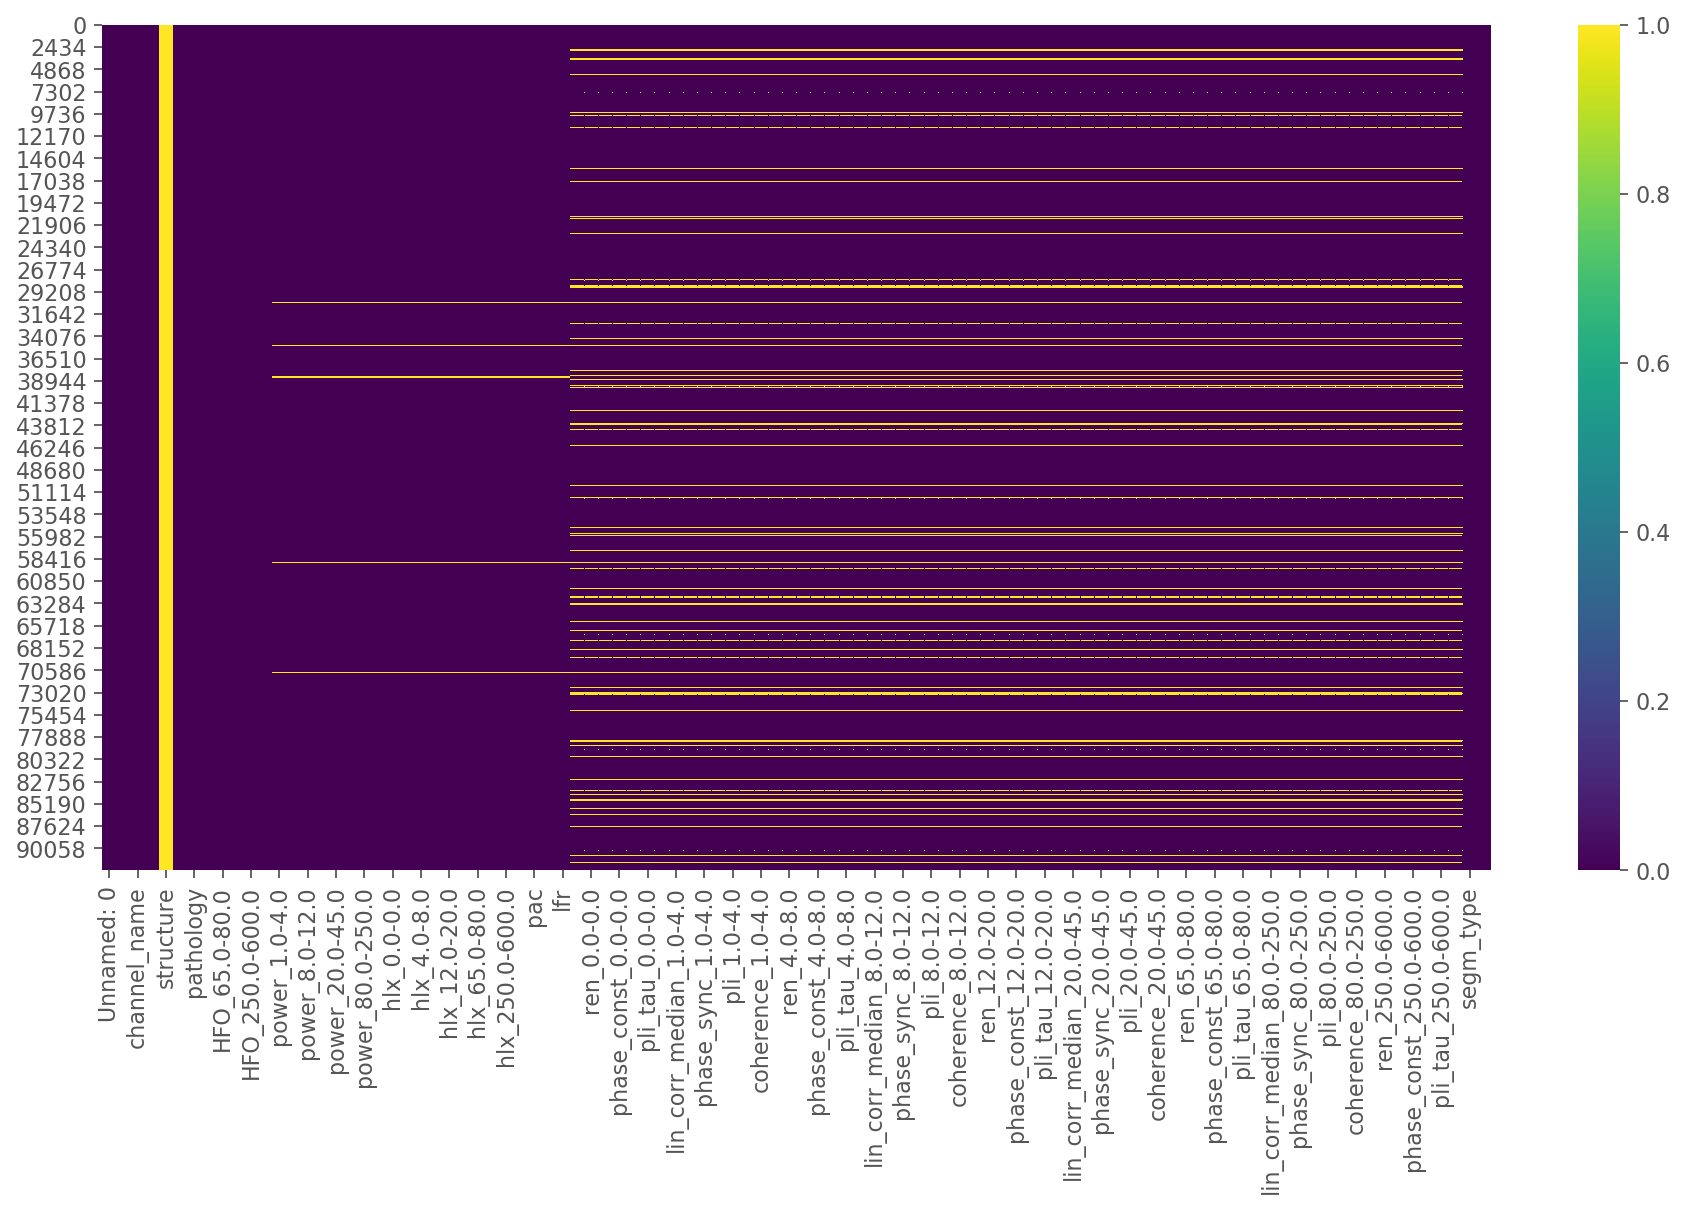

In [5]:
# Show null columns

sns.heatmap(epilepsy.isnull(), cmap = 'viridis', cbar = True);

#pd.options.display.min_rows = 30
#epilepsy.isnull().sum()

In [6]:
# Drop index column

epilepsy = epilepsy.loc[:, ~epilepsy.columns.str.contains('^Unnamed')]
epilepsy.head()

,patient_id,channel_name,resected,structure,onset_channel,pathology,outcome,HFO_65.0-80.0,HFO_80.0-250.0,HFO_250.0-600.0,...,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,phase_const_250.0-600.0,pli_250.0-600.0,pli_tau_250.0-600.0,coherence_250.0-600.0,segm_type,segm_number
0,583,ra1,0,NaN,NON_SOZ,normal,11.0,0,11,34,...,0.997413,0.990955,0.004121,0.970733,1.0,0.815222,-0.146667,0.994151,0,0
1,583,ra2,0,NaN,NON_SOZ,normal,11.0,0,16,40,...,0.998458,0.993981,0.002847,0.979349,1.0,0.841924,-0.113333,0.996071,0,0
2,583,ra3,0,NaN,NON_SOZ,normal,11.0,0,20,35,...,0.999506,0.996993,0.001647,0.987957,1.0,0.857311,-0.043333,0.997980,0,0
3,583,ra4,0,NaN,NON_SOZ,normal,11.0,0,27,37,...,0.999126,0.995900,0.002311,0.986385,1.0,0.852814,-0.036667,0.997646,0,0
4,583,ra5,0,NaN,NON_SOZ,normal,11.0,0,11,58,...,0.997734,0.995822,0.002367,0.986189,1.0,0.861413,-0.058333,0.997589,0,0


In [7]:
# Remove unnecessary columns

epilepsy = epilepsy.drop(['structure'], axis=1)
epilepsy.head()

,patient_id,channel_name,resected,onset_channel,pathology,outcome,HFO_65.0-80.0,HFO_80.0-250.0,HFO_250.0-600.0,spike_rate,...,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,phase_const_250.0-600.0,pli_250.0-600.0,pli_tau_250.0-600.0,coherence_250.0-600.0,segm_type,segm_number
0,583,ra1,0,NON_SOZ,normal,11.0,0,11,34,22,...,0.997413,0.990955,0.004121,0.970733,1.0,0.815222,-0.146667,0.994151,0,0
1,583,ra2,0,NON_SOZ,normal,11.0,0,16,40,49,...,0.998458,0.993981,0.002847,0.979349,1.0,0.841924,-0.113333,0.996071,0,0
2,583,ra3,0,NON_SOZ,normal,11.0,0,20,35,61,...,0.999506,0.996993,0.001647,0.987957,1.0,0.857311,-0.043333,0.997980,0,0
3,583,ra4,0,NON_SOZ,normal,11.0,0,27,37,66,...,0.999126,0.995900,0.002311,0.986385,1.0,0.852814,-0.036667,0.997646,0,0
4,583,ra5,0,NON_SOZ,normal,11.0,0,11,58,63,...,0.997734,0.995822,0.002367,0.986189,1.0,0.861413,-0.058333,0.997589,0,0


In [8]:
# Basic statistics

epilepsy.describe()

,patient_id,resected,outcome,HFO_65.0-80.0,HFO_80.0-250.0,HFO_250.0-600.0,spike_rate,power_1.0-4.0,power_4.0-8.0,power_8.0-12.0,...,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,phase_const_250.0-600.0,pli_250.0-600.0,pli_tau_250.0-600.0,coherence_250.0-600.0,segm_type,segm_number
count,92464.000000,92464.000000,92464.000000,92464.0,92464.000000,92464.000000,92464.000000,9.185100e+04,9.185100e+04,9.185100e+04,...,84751.000000,84751.000000,84751.000000,84751.000000,84751.000000,84751.000000,84751.000000,84751.000000,92464.000000,92464.000000
mean,537.303340,0.121647,23.258695,0.0,18.444627,32.607555,19.159565,3.177411e-01,2.887090e-01,2.387289e-01,...,0.921873,0.710600,0.030662,0.663745,0.041663,0.035568,-0.002958,0.899877,6.250000,0.562500
std,530.808972,0.326880,11.931679,0.0,18.584647,39.284876,37.979718,5.231405e-01,5.700138e-01,4.831948e-01,...,0.079289,0.308275,0.036740,0.324243,0.199820,0.171318,0.031019,0.097597,4.548376,0.788099
min,59.000000,0.000000,11.000000,0.0,0.000000,0.000000,0.000000,2.364873e-09,5.991072e-10,1.304421e-10,...,0.413911,-0.628716,0.000013,0.044833,0.000000,0.000000,-0.706667,0.645227,0.000000,0.000000
25%,74.000000,0.000000,11.000000,0.0,5.000000,5.000000,1.000000,4.768943e-06,1.300755e-06,4.188223e-07,...,0.843208,0.372571,0.005341,0.301537,0.000000,0.000000,0.000000,0.787374,1.750000,0.000000
50%,92.000000,0.000000,22.000000,0.0,13.000000,17.000000,6.000000,1.325354e-01,6.279375e-02,2.494825e-02,...,0.962194,0.920298,0.022501,0.856442,0.000000,0.000000,0.000000,0.956153,8.000000,0.000000
75%,1021.000000,0.000000,31.000000,0.0,26.000000,45.000000,20.000000,4.901011e-01,3.697457e-01,2.872959e-01,...,0.997170,0.988867,0.047192,0.967804,0.000000,0.000000,0.000000,0.993218,10.250000,1.000000
max,1718.000000,1.000000,42.000000,0.0,157.000000,335.000000,904.000000,1.649692e+01,1.779064e+01,1.057295e+01,...,1.000000,0.999997,1.034580,0.999998,1.000000,0.999540,0.356667,0.999999,12.000000,2.000000


In [9]:
# Correlatin matrix + rounding

corrmat = epilepsy.corr()
#pd.options.display.float_format = '{:.3f}'.format
corrmat.round(3)

,patient_id,resected,outcome,HFO_65.0-80.0,HFO_80.0-250.0,HFO_250.0-600.0,spike_rate,power_1.0-4.0,power_4.0-8.0,power_8.0-12.0,...,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,phase_const_250.0-600.0,pli_250.0-600.0,pli_tau_250.0-600.0,coherence_250.0-600.0,segm_type,segm_number
patient_id,1.000,0.166,-0.043,NaN,-0.020,0.184,-0.056,0.510,0.428,0.407,...,0.796,0.798,-0.570,0.823,-0.001,-0.002,0.011,0.821,-0.000,0.000
resected,0.166,1.000,0.016,NaN,0.245,0.133,0.244,0.097,0.041,0.035,...,0.140,0.149,-0.047,0.154,0.047,0.056,-0.082,0.152,-0.000,-0.000
outcome,-0.043,0.016,1.000,NaN,0.016,0.012,-0.025,0.063,-0.010,-0.062,...,0.028,0.016,-0.020,0.012,-0.042,-0.032,-0.030,0.008,0.000,0.000
HFO_65.0-80.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HFO_80.0-250.0,-0.020,0.245,0.016,NaN,1.000,0.429,0.653,0.006,-0.046,-0.062,...,-0.024,-0.023,0.256,-0.027,-0.033,-0.035,0.040,-0.032,0.008,0.008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pli_250.0-600.0,-0.002,0.056,-0.032,NaN,-0.035,0.058,0.028,0.065,0.112,0.151,...,0.185,0.183,-0.139,0.193,0.996,1.000,-0.502,0.193,-0.005,-0.028
pli_tau_250.0-600.0,0.011,-0.082,-0.030,NaN,0.040,-0.021,-0.009,-0.014,-0.029,-0.083,...,-0.090,-0.087,0.072,-0.095,-0.457,-0.502,1.000,-0.094,-0.012,0.022
coherence_250.0-600.0,0.821,0.152,0.008,NaN,-0.032,0.255,-0.061,0.506,0.452,0.456,...,0.921,0.990,-0.640,0.998,0.192,0.193,-0.094,1.000,0.031,0.011
segm_type,-0.000,-0.000,0.000,NaN,0.008,-0.032,0.005,-0.022,-0.027,-0.039,...,0.008,0.034,0.013,0.028,-0.004,-0.005,-0.012,0.031,1.000,0.065


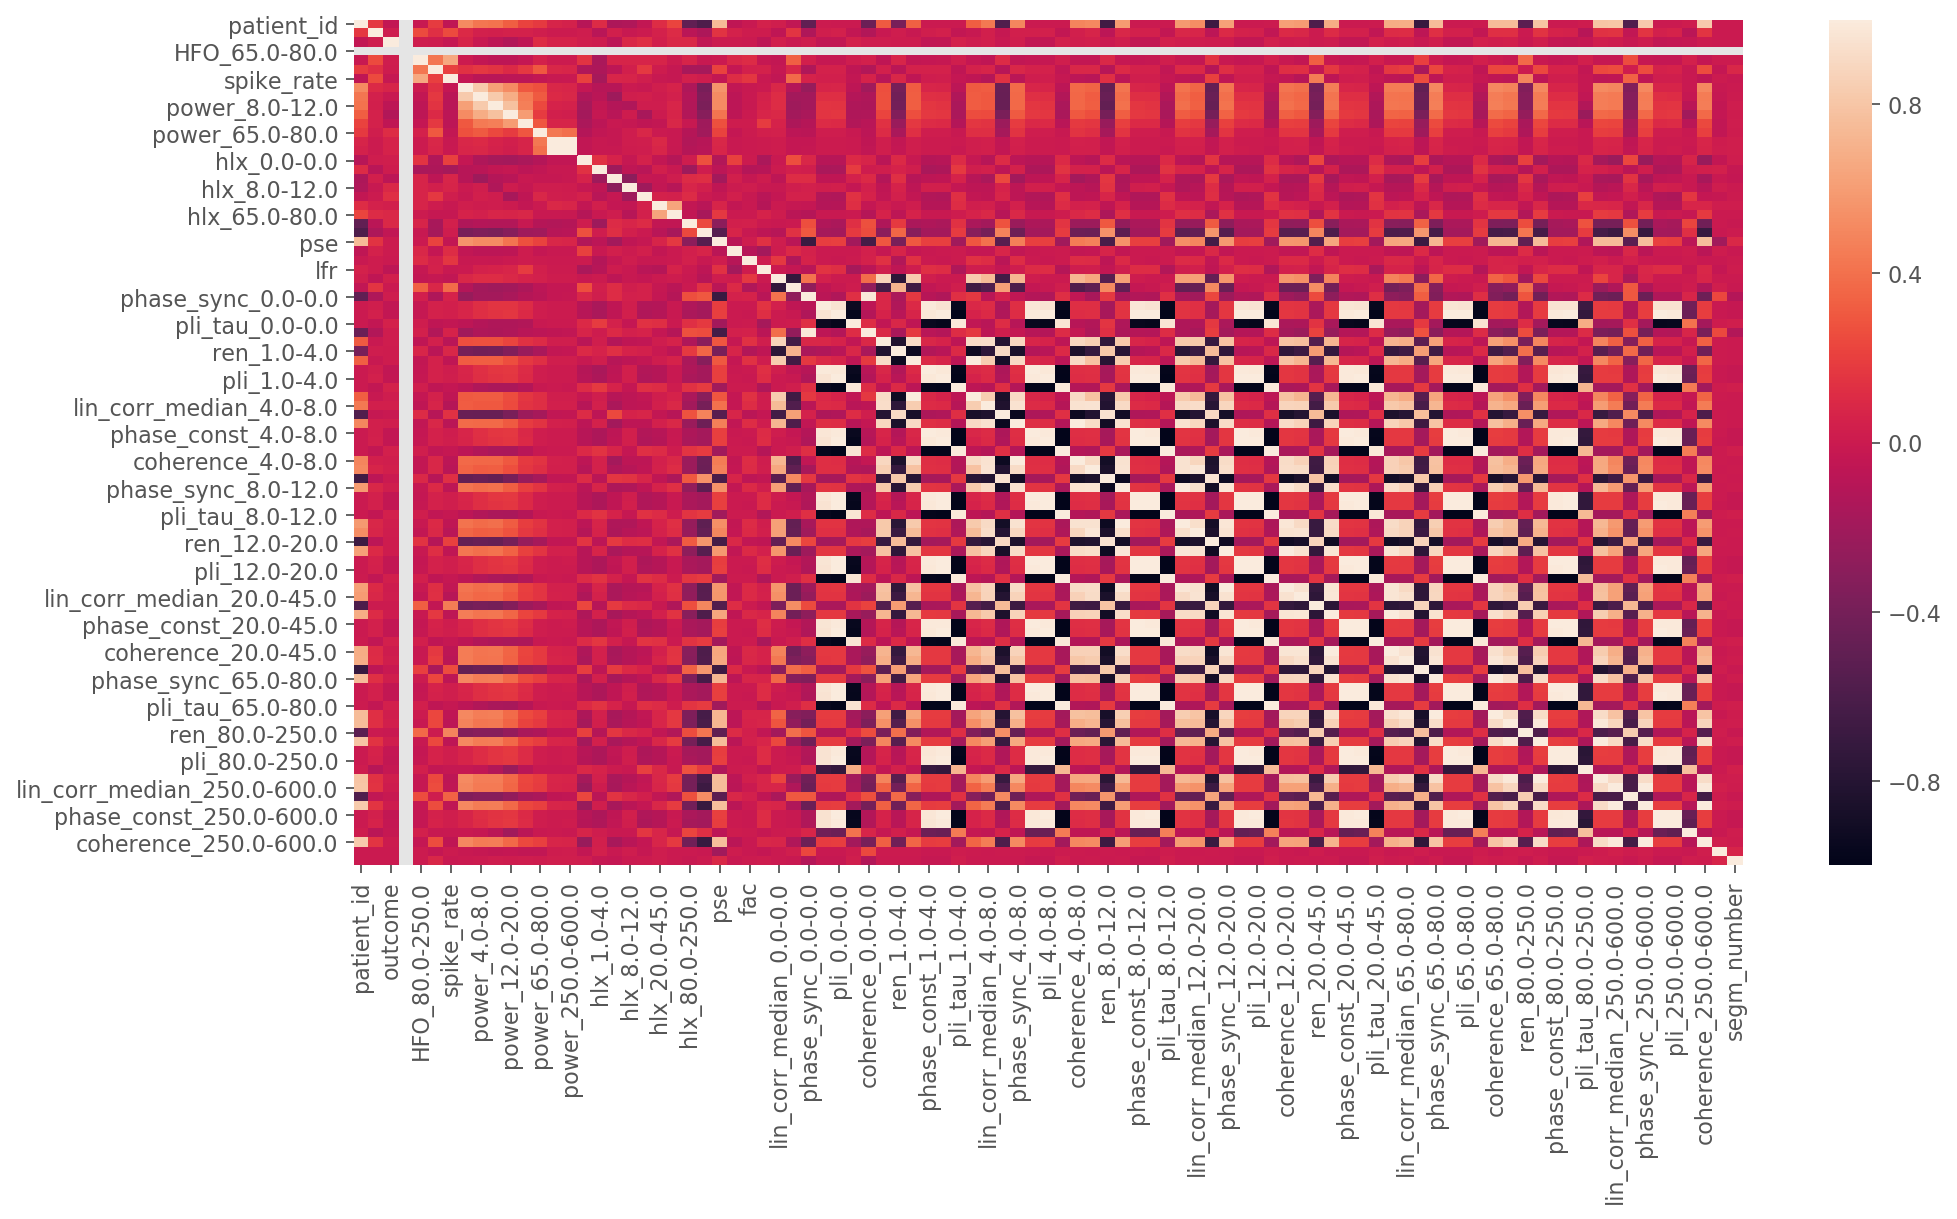

In [10]:
# Correlation matrix heatmap

sns.heatmap(corrmat);

In [11]:
# Columns names

cols = epilepsy.columns
print(list(cols))

['patient_id', 'channel_name', 'resected', 'onset_channel', 'pathology', 'outcome', 'HFO_65.0-80.0', 'HFO_80.0-250.0', 'HFO_250.0-600.0', 'spike_rate', 'power_1.0-4.0', 'power_4.0-8.0', 'power_8.0-12.0', 'power_12.0-20.0', 'power_20.0-45.0', 'power_65.0-80.0', 'power_80.0-250.0', 'power_250.0-600.0', 'hlx_0.0-0.0', 'hlx_1.0-4.0', 'hlx_4.0-8.0', 'hlx_8.0-12.0', 'hlx_12.0-20.0', 'hlx_20.0-45.0', 'hlx_65.0-80.0', 'hlx_80.0-250.0', 'hlx_250.0-600.0', 'pse', 'pac', 'fac', 'lfr', 'lin_corr_median_0.0-0.0', 'ren_0.0-0.0', 'phase_sync_0.0-0.0', 'phase_const_0.0-0.0', 'pli_0.0-0.0', 'pli_tau_0.0-0.0', 'coherence_0.0-0.0', 'lin_corr_median_1.0-4.0', 'ren_1.0-4.0', 'phase_sync_1.0-4.0', 'phase_const_1.0-4.0', 'pli_1.0-4.0', 'pli_tau_1.0-4.0', 'coherence_1.0-4.0', 'lin_corr_median_4.0-8.0', 'ren_4.0-8.0', 'phase_sync_4.0-8.0', 'phase_const_4.0-8.0', 'pli_4.0-8.0', 'pli_tau_4.0-8.0', 'coherence_4.0-8.0', 'lin_corr_median_8.0-12.0', 'ren_8.0-12.0', 'phase_sync_8.0-12.0', 'phase_const_8.0-12.0', 'pli

In [12]:
# Split epilepsy dataset to Montreal & Brno dataframe

df_montreal, df_brno = [x for _, x in epilepsy.groupby(epilepsy['patient_id'] < 100)]

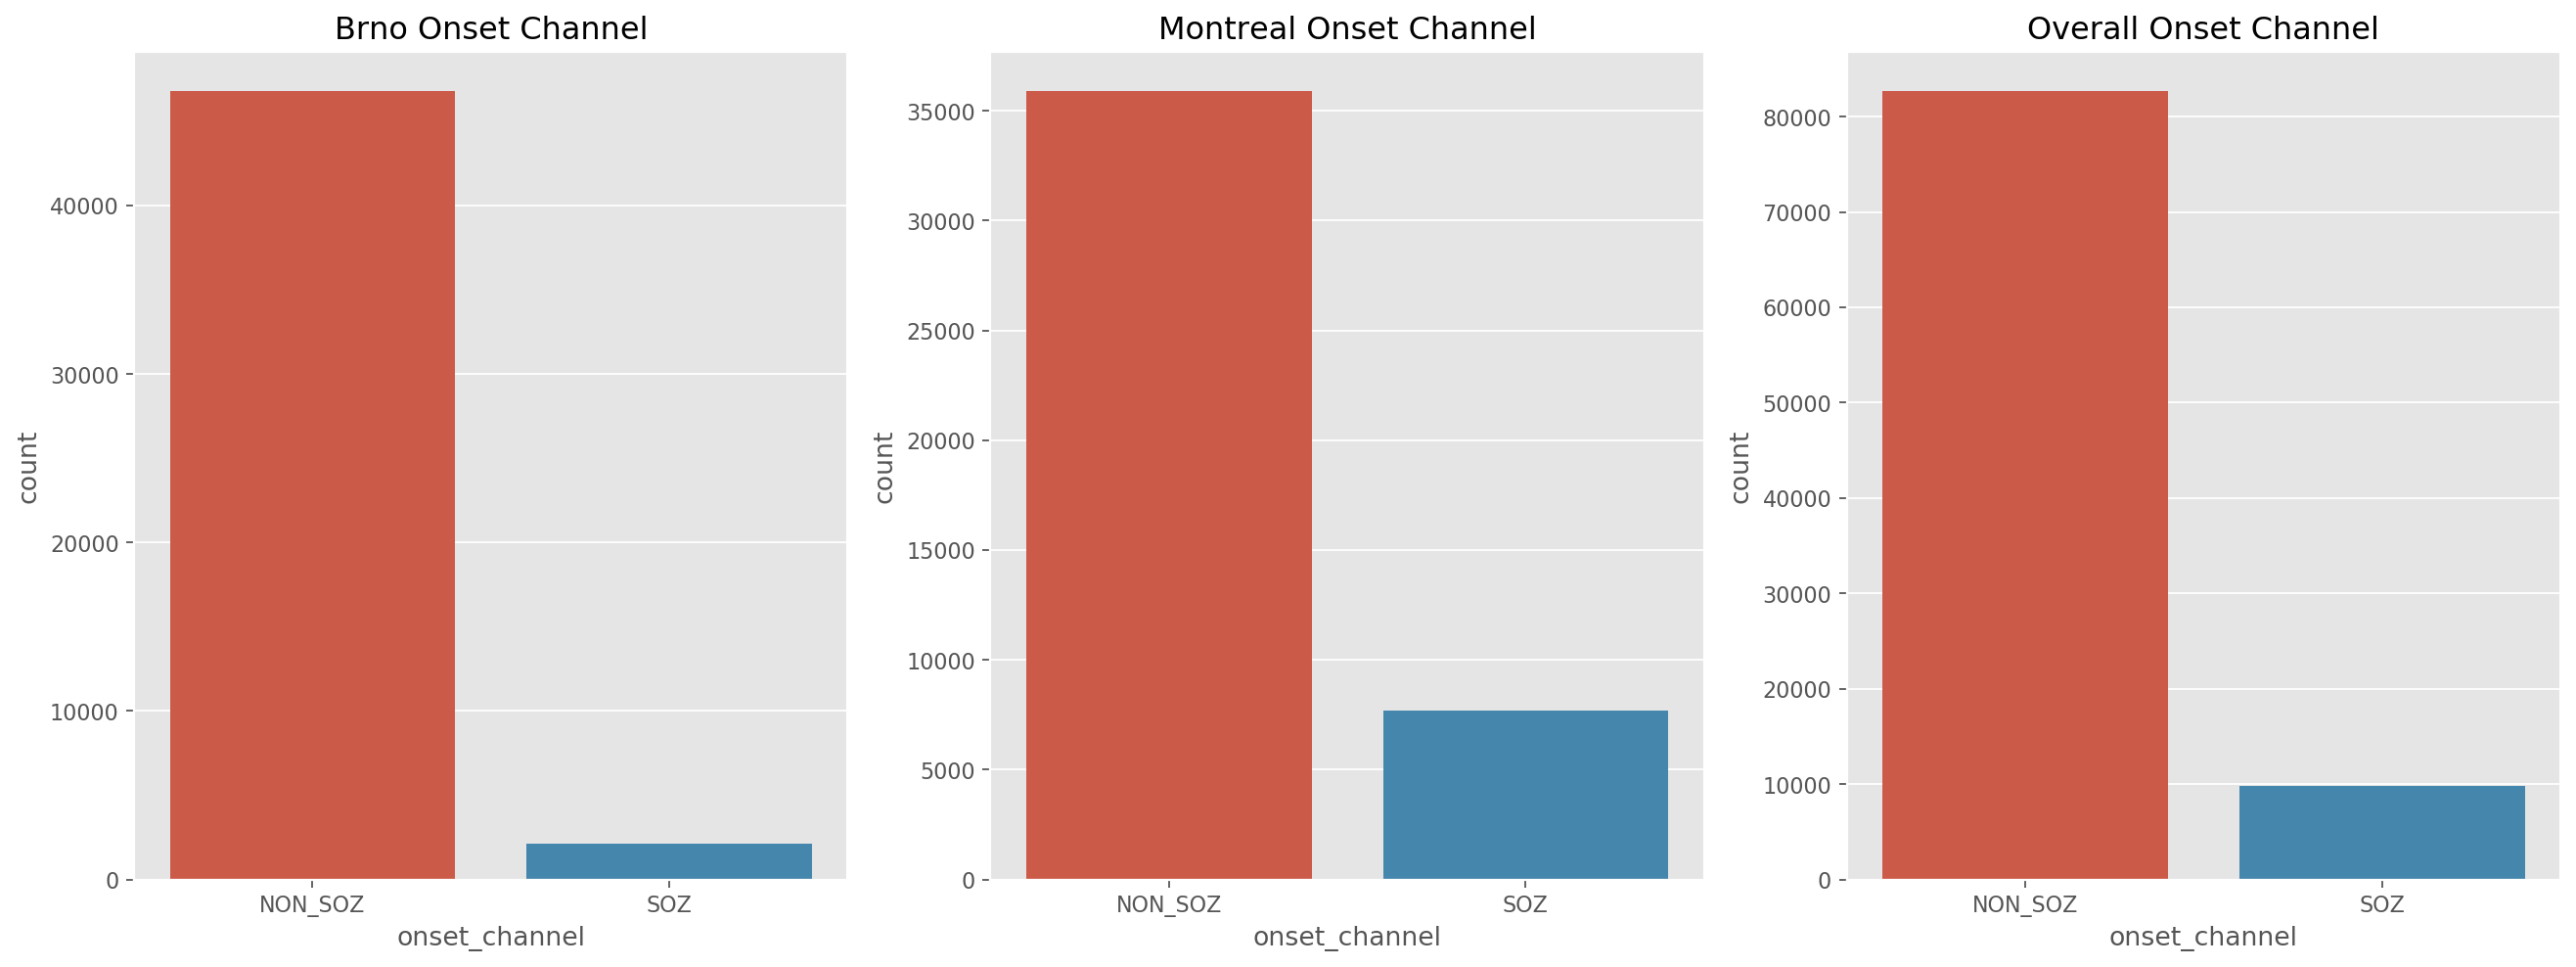

In [13]:
# Onset channels countplots

fig, ax = plt.subplots(1,3, figsize = (20, 7))

sns.countplot('onset_channel', data = df_brno, ax = ax[0])
ax[0].title.set_text('Brno Onset Channel')

sns.countplot('onset_channel', data = df_montreal, ax = ax[1])
ax[1].title.set_text('Montreal Onset Channel')

sns.countplot('onset_channel', data = epilepsy, ax = ax[2])
ax[2].title.set_text('Overall Onset Channel')

#epilepsy['onset_channel'].value_counts()
#epilepsy['onset_channel'].value_counts().plot.pie(autopct = '%1.2f%%');

plt.show()

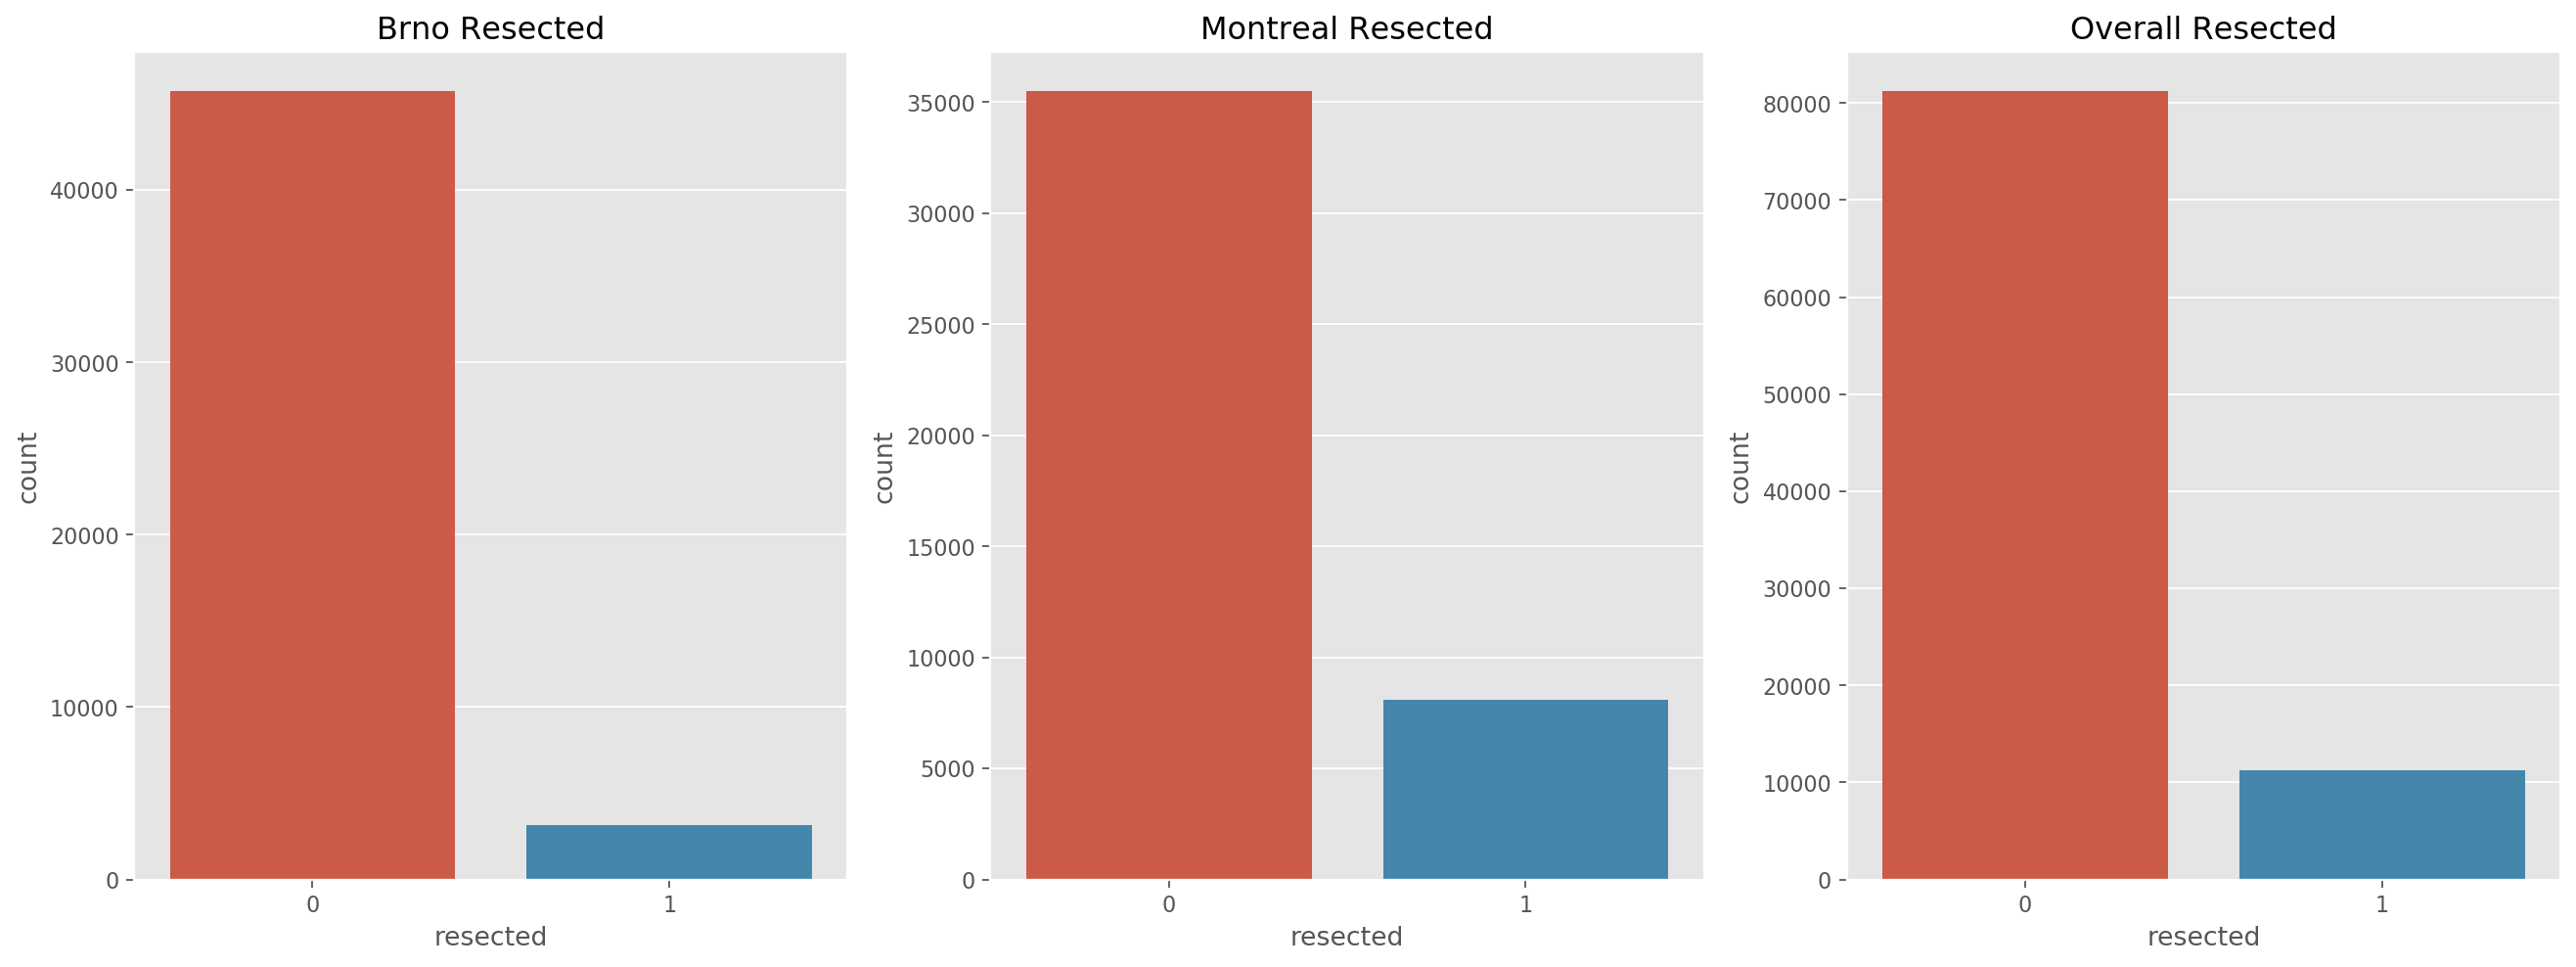

In [14]:
# Resected countplots

fig, ax = plt.subplots(1,3, figsize = (20, 7))

sns.countplot('resected', data = df_brno, ax = ax[0])
ax[0].title.set_text('Brno Resected')

sns.countplot('resected', data = df_montreal, ax = ax[1])
ax[1].title.set_text('Montreal Resected')

sns.countplot('resected', data = epilepsy, ax = ax[2])
ax[2].title.set_text('Overall Resected')

plt.show()

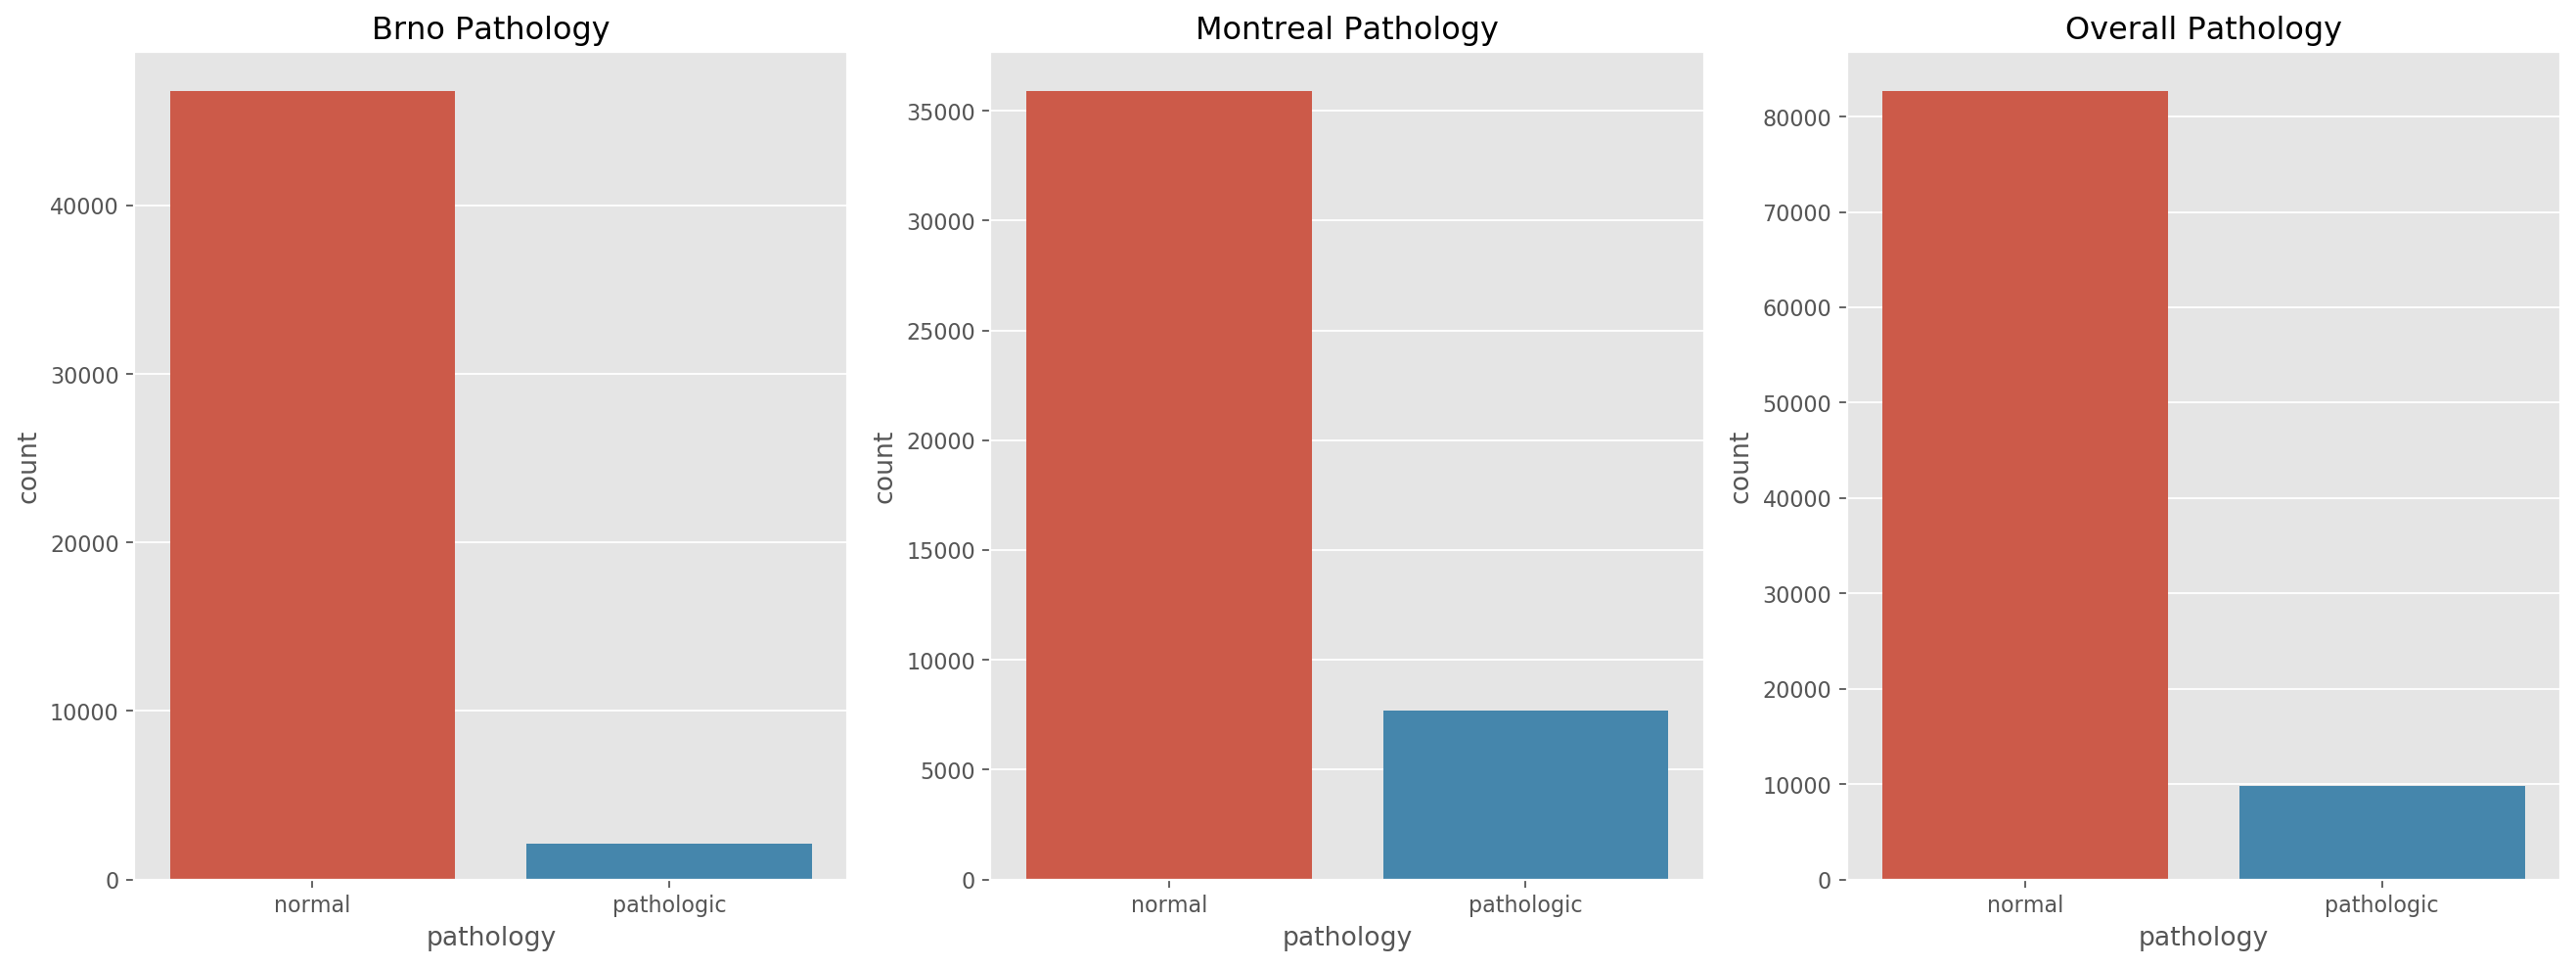

In [15]:
# Pathology countplot

fig, ax = plt.subplots(1,3, figsize = (20, 7))

sns.countplot('pathology', data = df_brno, ax = ax[0])
ax[0].title.set_text('Brno Pathology')

sns.countplot('pathology', data = df_montreal, ax = ax[1])
ax[1].title.set_text('Montreal Pathology')

sns.countplot('pathology', data = epilepsy, ax = ax[2])
ax[2].title.set_text('Overall Pathology')

plt.show()

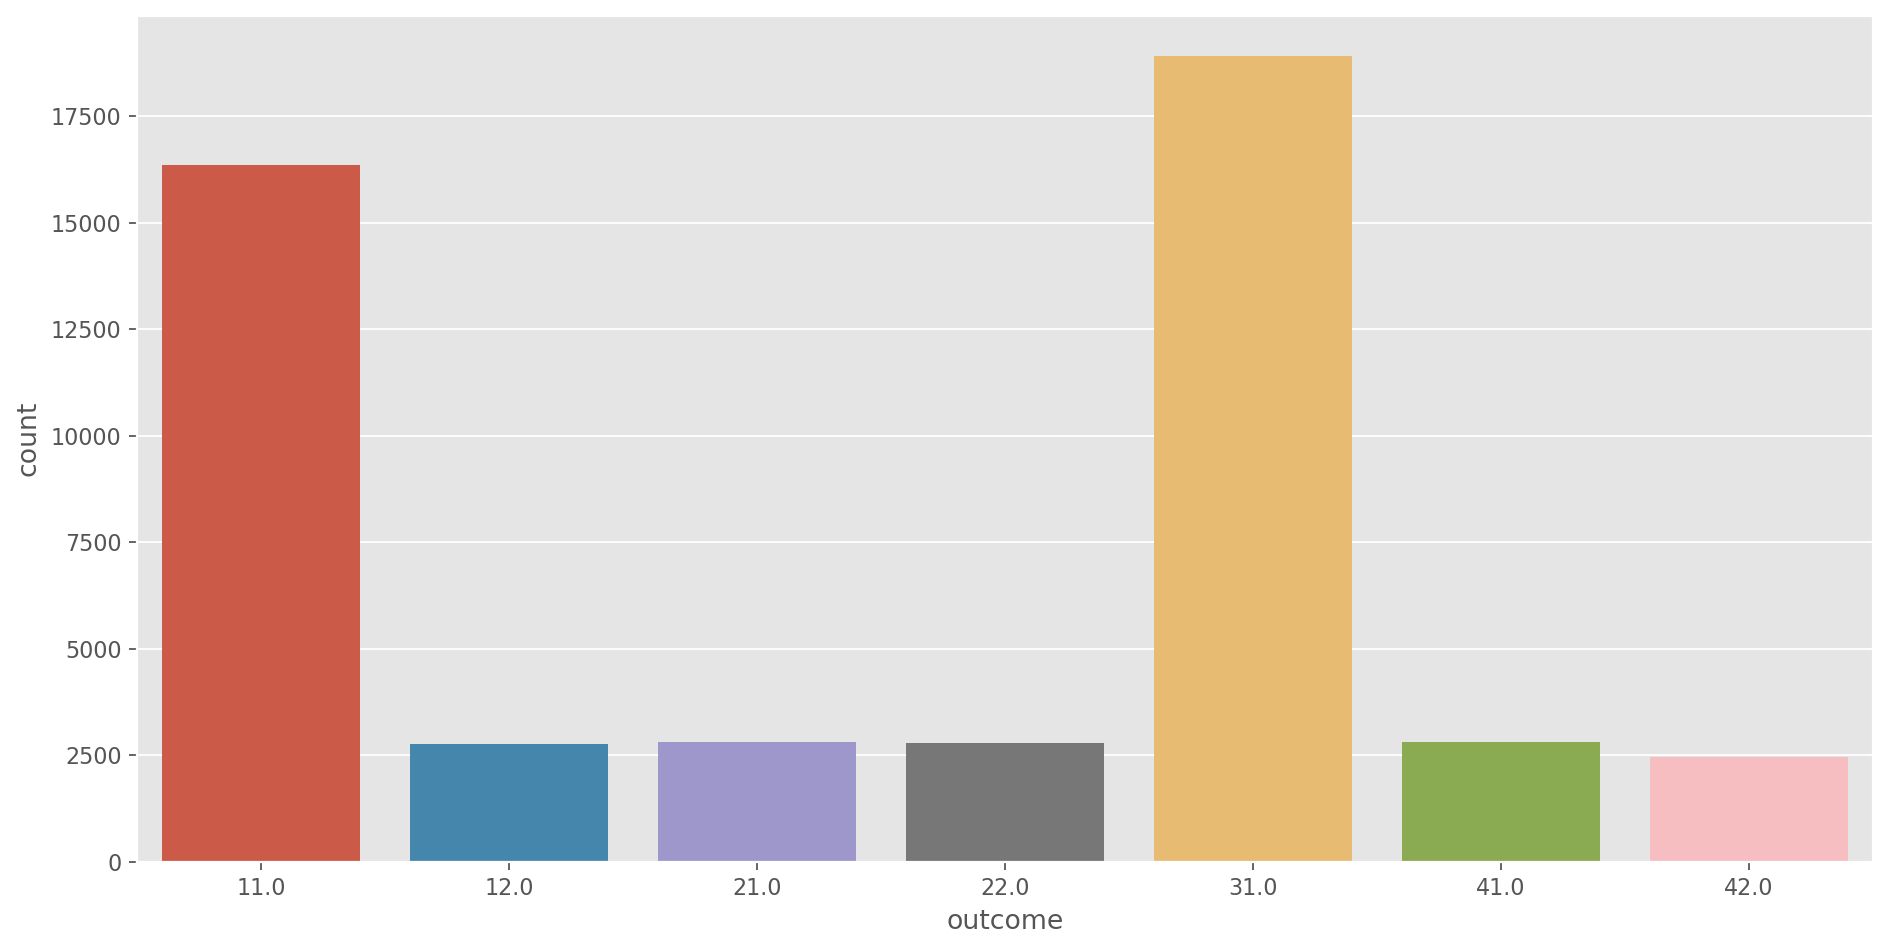

In [16]:
# Brno oucome countplot

sns.countplot('outcome', data = df_brno);

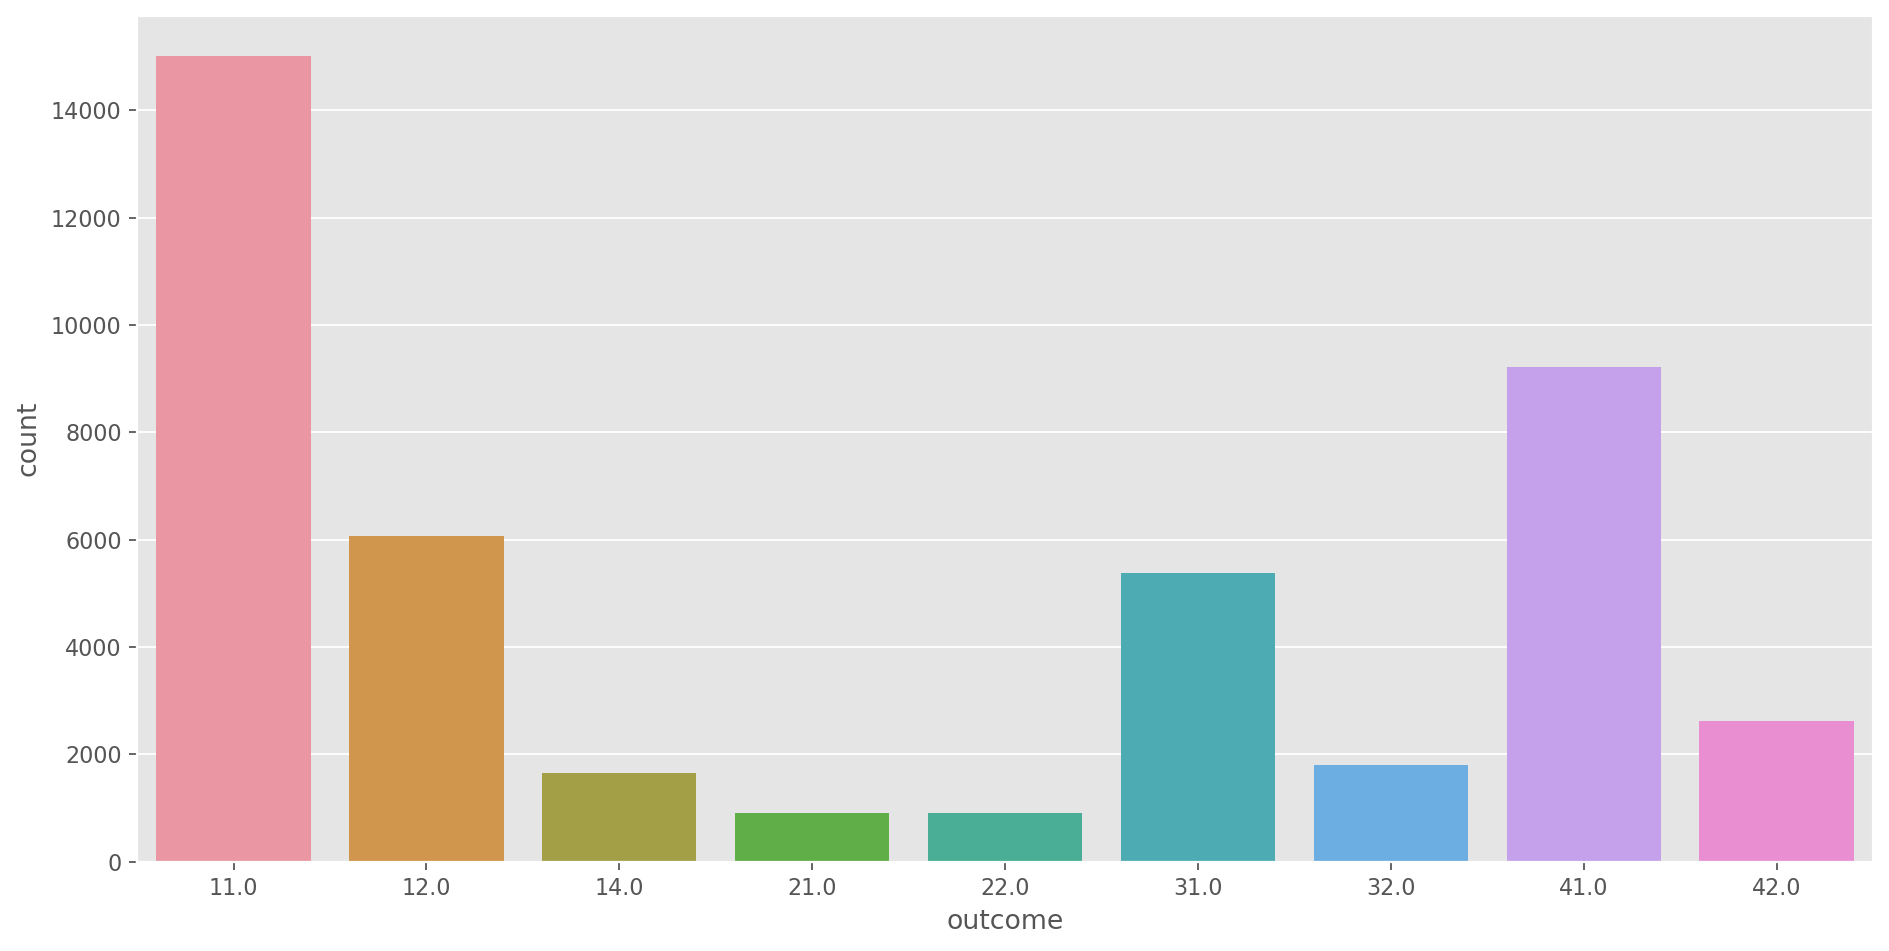

In [17]:
# Montreal oucome countplot

sns.countplot('outcome', data = df_montreal);

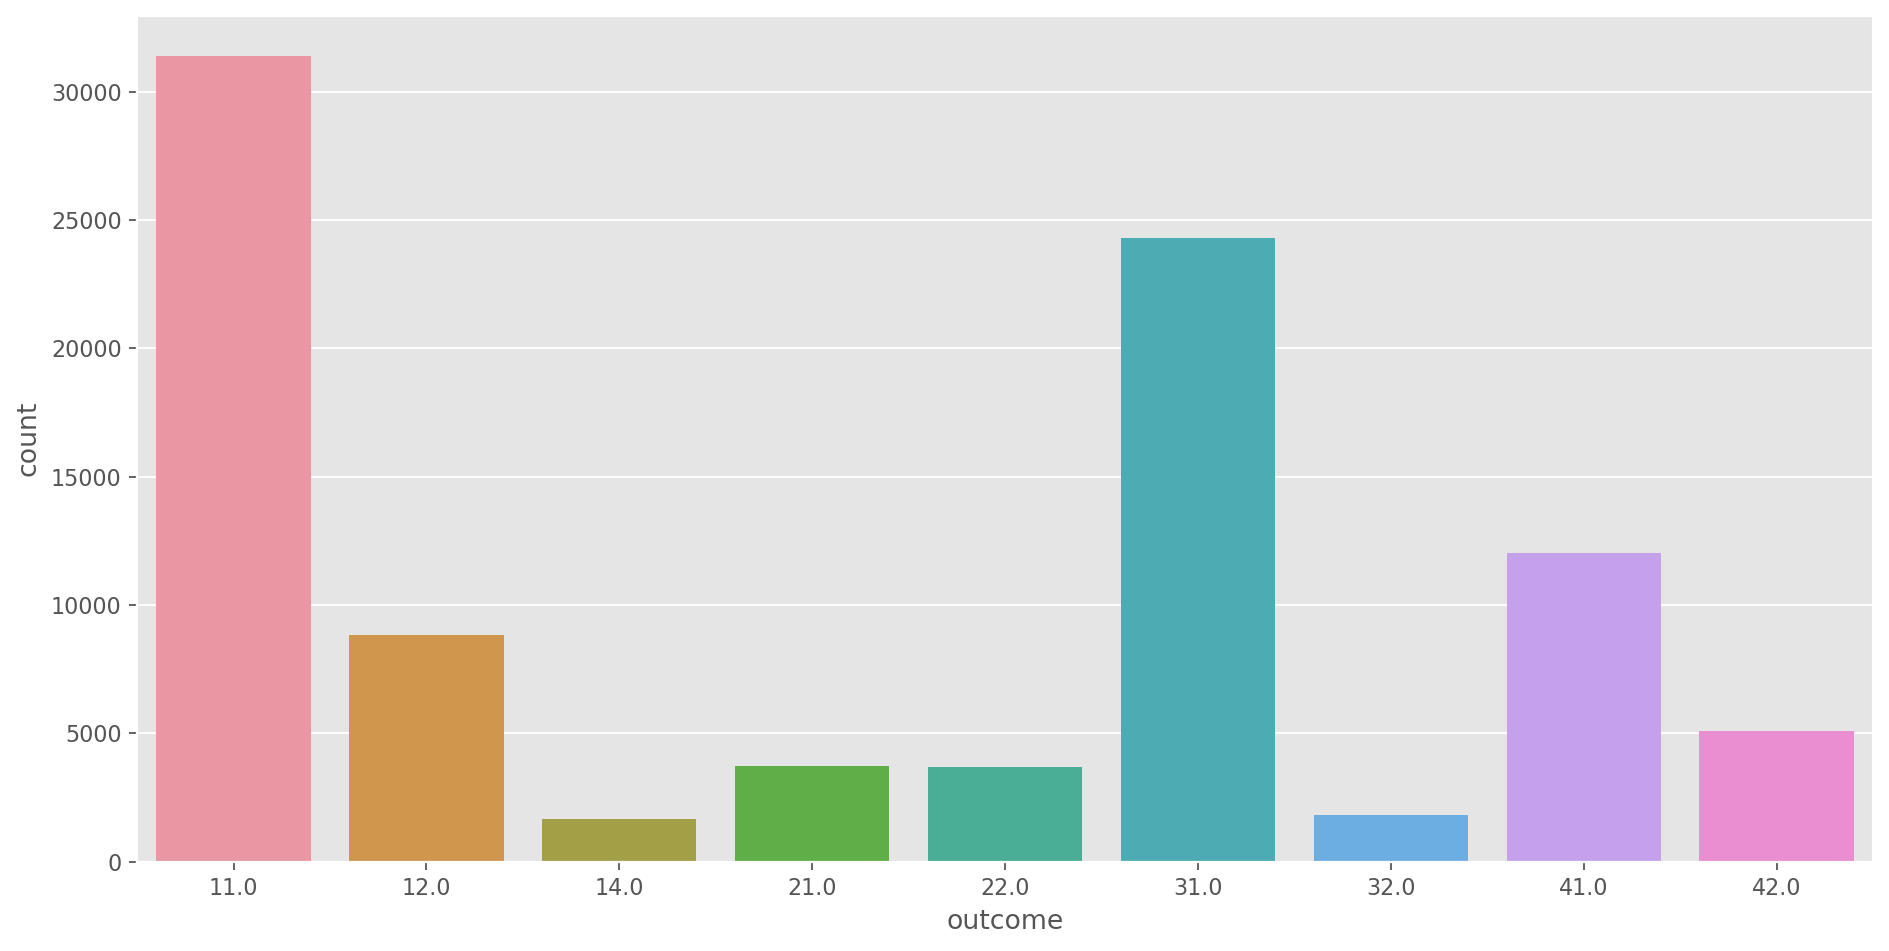

In [18]:
# Overall oucome countplot

sns.countplot('outcome', data = epilepsy);
#sns.distplot(epilepsy['outcome']);
#sns.kdeplot(epilepsy['outcome'], shade = True);

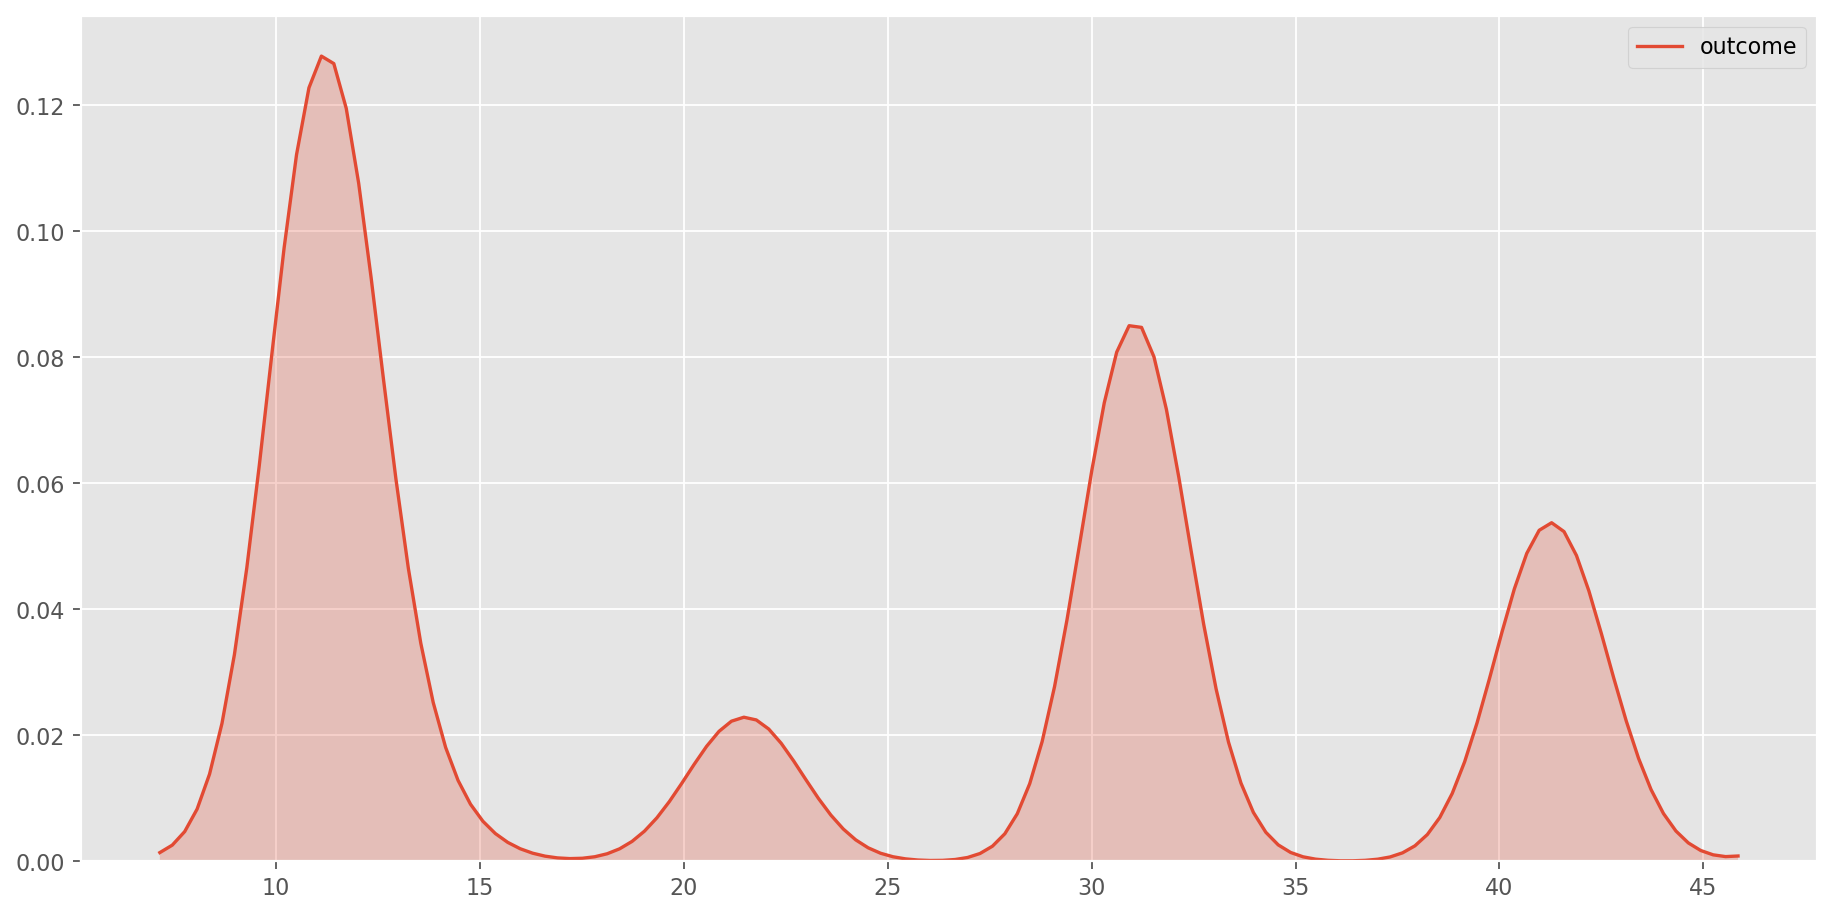

In [19]:
# Overall outcome KDE plot 

sns.kdeplot(epilepsy['outcome'], shade = True);

In [20]:
# Country column

epilepsy.loc[epilepsy['patient_id'] < 100 , 'country'] = 'Brno' 
epilepsy.loc[epilepsy['patient_id'] > 100 , 'country'] = 'Montreal' 
epilepsy.head()

,patient_id,channel_name,resected,onset_channel,pathology,outcome,HFO_65.0-80.0,HFO_80.0-250.0,HFO_250.0-600.0,spike_rate,...,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,phase_const_250.0-600.0,pli_250.0-600.0,pli_tau_250.0-600.0,coherence_250.0-600.0,segm_type,segm_number,country
0,583,ra1,0,NON_SOZ,normal,11.0,0,11,34,22,...,0.990955,0.004121,0.970733,1.0,0.815222,-0.146667,0.994151,0,0,Montreal
1,583,ra2,0,NON_SOZ,normal,11.0,0,16,40,49,...,0.993981,0.002847,0.979349,1.0,0.841924,-0.113333,0.996071,0,0,Montreal
2,583,ra3,0,NON_SOZ,normal,11.0,0,20,35,61,...,0.996993,0.001647,0.987957,1.0,0.857311,-0.043333,0.997980,0,0,Montreal
3,583,ra4,0,NON_SOZ,normal,11.0,0,27,37,66,...,0.995900,0.002311,0.986385,1.0,0.852814,-0.036667,0.997646,0,0,Montreal
4,583,ra5,0,NON_SOZ,normal,11.0,0,11,58,63,...,0.995822,0.002367,0.986189,1.0,0.861413,-0.058333,0.997589,0,0,Montreal


In [21]:
# Onset channels in numbers

epilepsy.groupby(['country', 'onset_channel'])['onset_channel'].count()

country   onset_channel
Brno      NON_SOZ          46784
          SOZ               2112
Montreal  NON_SOZ          35888
          SOZ               7680
Name: onset_channel, dtype: int64

In [22]:
# Resected in numbers

epilepsy.groupby(['country', 'resected'])['resected'].count()

country   resected
Brno      0           45728
          1            3168
Montreal  0           35488
          1            8080
Name: resected, dtype: int64

In [23]:
# Pathology in numbers

epilepsy.groupby(['country', 'pathology'])['pathology'].count()

country   pathology 
Brno      normal        46784
          pathologic     2112
Montreal  normal        35888
          pathologic     7680
Name: pathology, dtype: int64

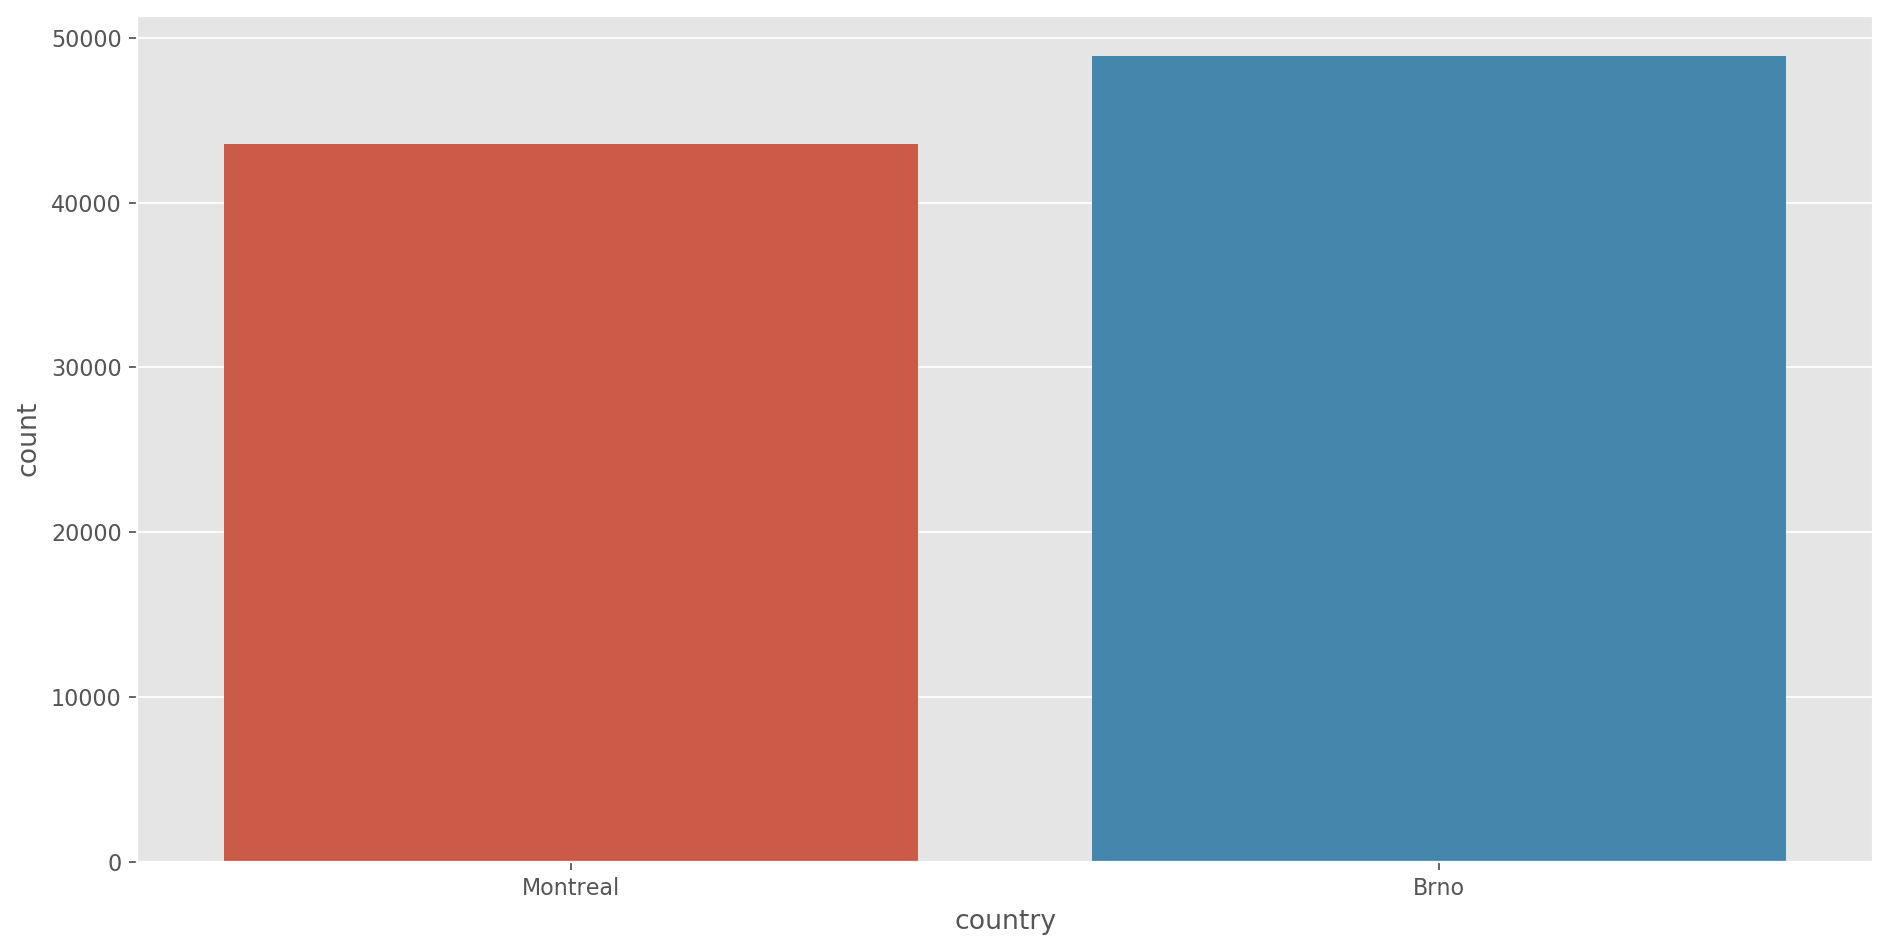

In [24]:
# Country countplot

sns.countplot('country', data = epilepsy);

In [25]:
# Country in numbers

epilepsy['country'].value_counts()

Brno        48896
Montreal    43568
Name: country, dtype: int64

In [26]:
# Number of patients

epilepsy['patient_id'].nunique()

53

In [27]:
# Number of patients in Brno

df_brno['patient_id'].nunique()

19

In [28]:
# Number of patients in Montreal

df_montreal['patient_id'].nunique()

34

In [29]:
# Number of unique channel names 

epilepsy['channel_name'].nunique()

1740

In [30]:
# Number of outcome per country

epilepsy.groupby(['country', 'outcome'])['outcome'].count()

country   outcome
Brno      11.0       16368
          12.0        2768
          21.0        2800
          22.0        2784
          31.0       18912
          41.0        2800
          42.0        2464
Montreal  11.0       15008
          12.0        6064
          14.0        1648
          21.0         912
          22.0         912
          31.0        5376
          32.0        1808
          41.0        9216
          42.0        2624
Name: outcome, dtype: int64

In [31]:
# Number of spike rates 

epilepsy['spike_rate'].nunique()

429

In [32]:
# Number of segm_type per country

epilepsy.groupby(['country', 'segm_type'])['segm_type'].count()

country   segm_type
Brno      0            9168
          1            3056
          2            3056
          3            3056
          4            3056
          8            9168
          9            3056
          10           3056
          11           3056
          12           9168
Montreal  0            8169
          1            2723
          2            2723
          3            2723
          4            2723
          8            8169
          9            2723
          10           2723
          11           2723
          12           8169
Name: segm_type, dtype: int64

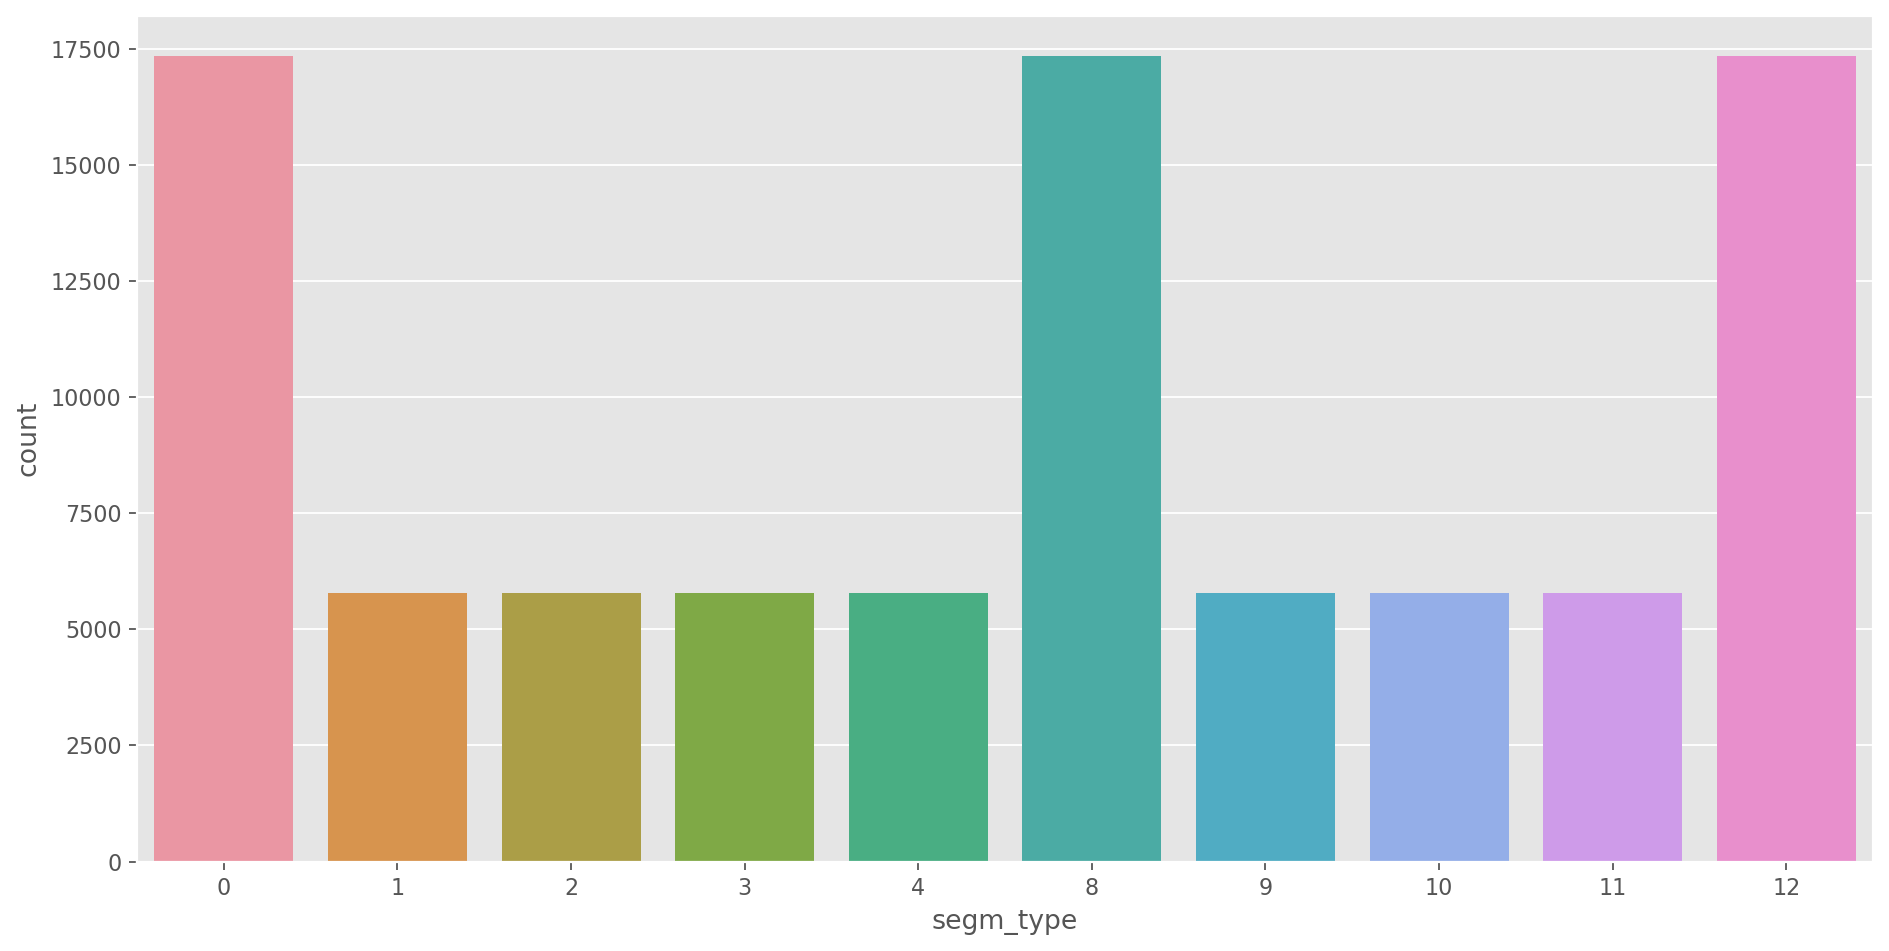

In [33]:
# Overall segm type countplot 

sns.countplot('segm_type', data = epilepsy);

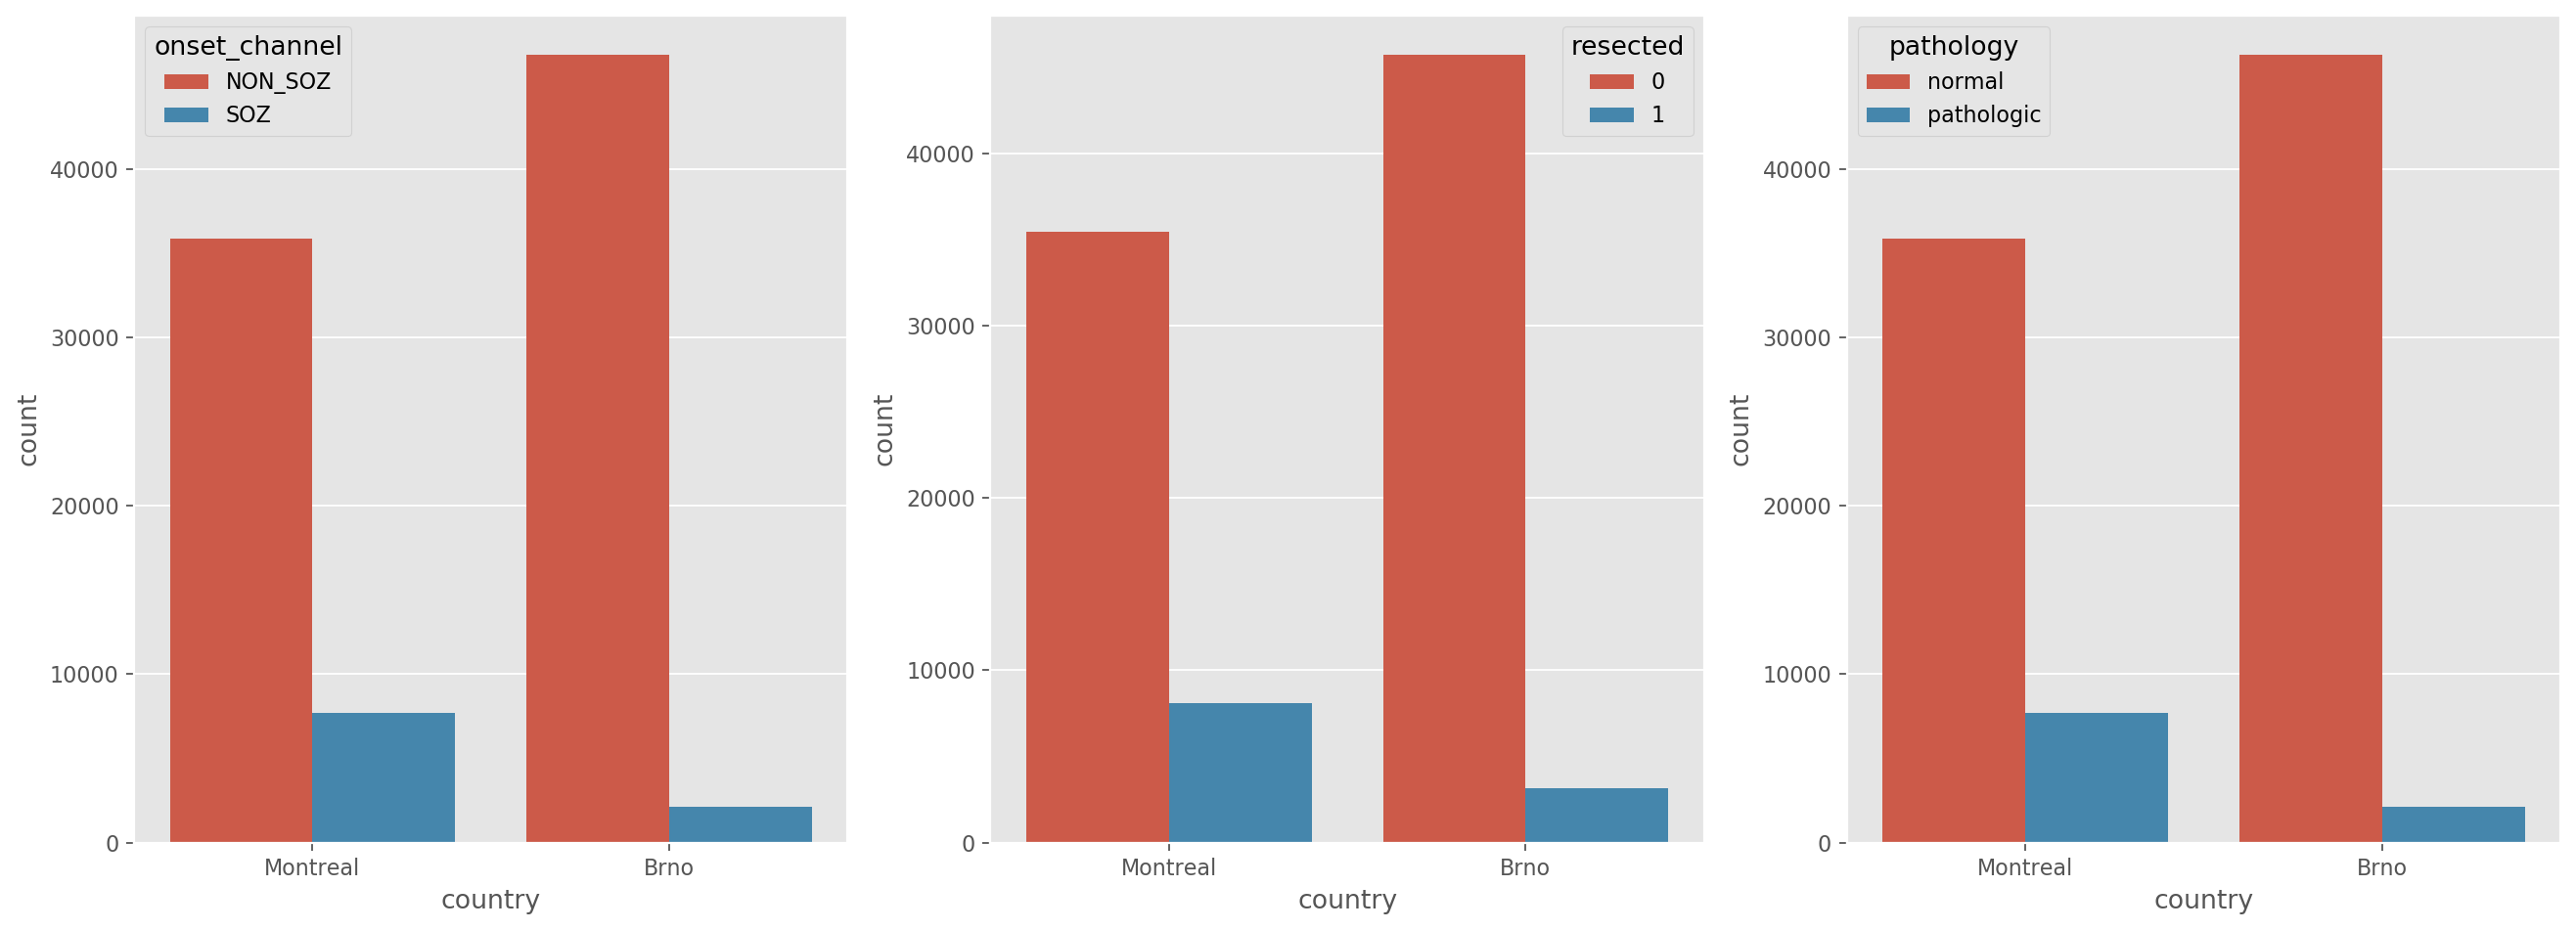

In [34]:
# Onset channels, resected, pathology countplots

fig, ax = plt.subplots(1,3, figsize = (20, 7))

sns.countplot('country', data = epilepsy, hue = 'onset_channel', ax = ax[0] );
sns.countplot('country', data = epilepsy, hue = 'resected', ax = ax[1] );
sns.countplot('country', data = epilepsy, hue = 'pathology', ax = ax[2] );

plt.show()

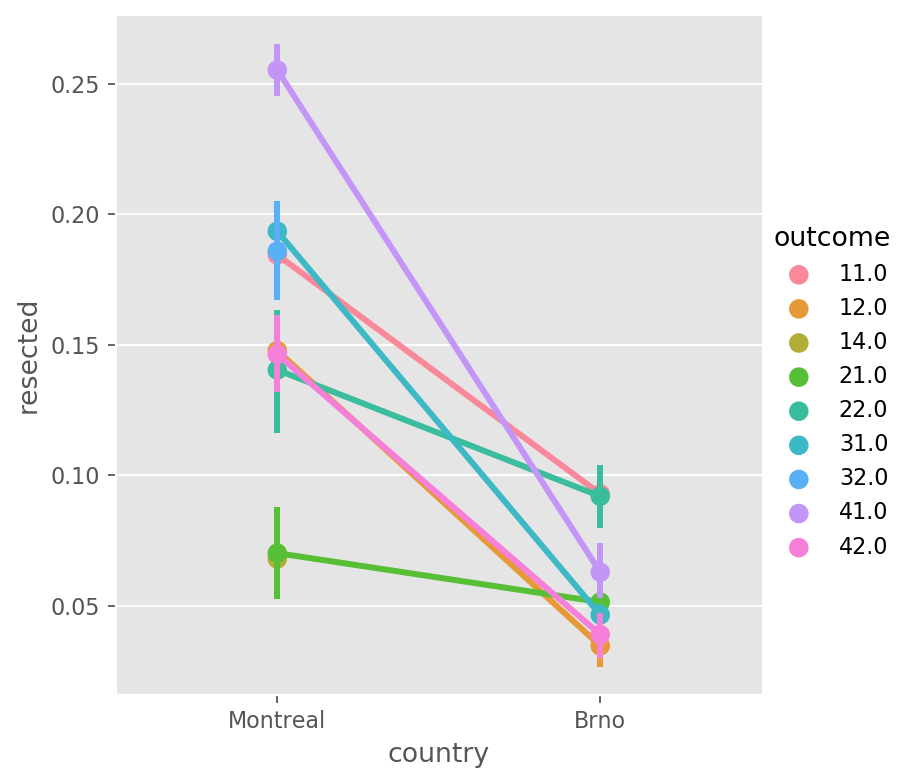

In [35]:
# Overall outcome per country catplot 

sns.catplot(x = 'country', y = 'resected', kind = 'point', data = epilepsy, hue = 'outcome');

In [36]:
# Elipepsy dataframe with datatypes

epilepsy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92464 entries, 0 to 92463
Data columns (total 97 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   patient_id                   92464 non-null  int64  
 1   channel_name                 92464 non-null  object 
 2   resected                     92464 non-null  int64  
 3   onset_channel                92464 non-null  object 
 4   pathology                    92464 non-null  object 
 5   outcome                      92464 non-null  float64
 6   HFO_65.0-80.0                92464 non-null  int64  
 7   HFO_80.0-250.0               92464 non-null  int64  
 8   HFO_250.0-600.0              92464 non-null  int64  
 9   spike_rate                   92464 non-null  int64  
 10  power_1.0-4.0                91851 non-null  float64
 11  power_4.0-8.0                91851 non-null  float64
 12  power_8.0-12.0               91851 non-null  float64
 13  power_12.0-20.0 

In [37]:
# Drop columns no. 0, 1, and 6

df_epilepsy = epilepsy.drop(epilepsy.columns[[0, 1, 2, 5, 6]], axis=1)
df_brno = df_brno.drop(df_brno.columns[[0, 1, 2, 5, 6]], axis=1)
df_montreal = df_montreal.drop(df_montreal.columns[[0, 1, 2, 5, 6]], axis=1)

In [38]:
# Start H2o

import h2o 
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 hour 4 mins
H2O_cluster_timezone:,Europe/Prague
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.2
H2O_cluster_version_age:,1 month and 13 days
H2O_cluster_name:,H2O_from_python_Rodina_r7fxce
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.280 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [39]:
# Parse dataframe df_epilepsy to H2o

h2o_df = h2o.H2OFrame(df_epilepsy)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [40]:
# Dataframe summary describe

h2o_df.describe()

Rows:92464
Cols:92




,onset_channel,pathology,HFO_80.0-250.0,HFO_250.0-600.0,spike_rate,power_1.0-4.0,power_4.0-8.0,power_8.0-12.0,power_12.0-20.0,power_20.0-45.0,power_65.0-80.0,power_80.0-250.0,power_250.0-600.0,hlx_0.0-0.0,hlx_1.0-4.0,hlx_4.0-8.0,hlx_8.0-12.0,hlx_12.0-20.0,hlx_20.0-45.0,hlx_65.0-80.0,hlx_80.0-250.0,hlx_250.0-600.0,pse,pac,fac,lfr,lin_corr_median_0.0-0.0,ren_0.0-0.0,phase_sync_0.0-0.0,phase_const_0.0-0.0,pli_0.0-0.0,pli_tau_0.0-0.0,coherence_0.0-0.0,lin_corr_median_1.0-4.0,ren_1.0-4.0,phase_sync_1.0-4.0,phase_const_1.0-4.0,pli_1.0-4.0,pli_tau_1.0-4.0,coherence_1.0-4.0,lin_corr_median_4.0-8.0,ren_4.0-8.0,phase_sync_4.0-8.0,phase_const_4.0-8.0,pli_4.0-8.0,pli_tau_4.0-8.0,coherence_4.0-8.0,lin_corr_median_8.0-12.0,ren_8.0-12.0,phase_sync_8.0-12.0,phase_const_8.0-12.0,pli_8.0-12.0,pli_tau_8.0-12.0,coherence_8.0-12.0,lin_corr_median_12.0-20.0,ren_12.0-20.0,phase_sync_12.0-20.0,phase_const_12.0-20.0,pli_12.0-20.0,pli_tau_12.0-20.0,coherence_12.0-20.0,lin_corr_median_20.0-45.0,ren_20.0-45.0,phase_sync_20.0-45.0,phase_const_20.0-45.0,pli_20.0-45.0,pli_tau_20.0-45.0,coherence_20.0-45.0,lin_corr_median_65.0-80.0,ren_65.0-80.0,phase_sync_65.0-80.0,phase_const_65.0-80.0,pli_65.0-80.0,pli_tau_65.0-80.0,coherence_65.0-80.0,lin_corr_median_80.0-250.0,ren_80.0-250.0,phase_sync_80.0-250.0,phase_const_80.0-250.0,pli_80.0-250.0,pli_tau_80.0-250.0,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,phase_const_250.0-600.0,pli_250.0-600.0,pli_tau_250.0-600.0,coherence_250.0-600.0,segm_type,segm_number,country
type,enum,enum,int,int,int,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,real,int,real,real,real,int,int,enum
mins,,,0.0,0.0,0.0,2.364873452899435e-09,5.991071834409485e-10,1.30442119819651e-10,1.1681560430904823e-10,7.101002637861296e-11,2.7499975461833418e-12,9.00901396503794e-12,1.791892948869557e-12,1.3057179148991902,1.0262446661790212,1.024207173784574,1.009632244706154,1.0085392993688584,1.000543340841929,1.003492754101753,1.007588633298874,1.0338828110694884,4.1345508072694234e-08,-0.0696039786934852,-0.0550748613497449,0.0001713543694596,-0.7683093715831637,0.0007888324235439,0.0609050278140542,0.0,0.0,-218.58333333333331,0.3285223725189765,-0.8999604328970114,0.0002853959685614,0.4160011687564353,0.0,0.0,-219.0,0.7514204303423564,-0.7575910468026996,0.0002662190965012,0.3625855857071777,0.0,0.0,-111.8,0.7670663423339525,-0.7077642927538059,0.0001355320757778,0.3679261469530562,0.0,0.0,-77.29333333333332,0.8077897173166275,-0.5553509854665026,8.274119297719079e-05,0.2741534049808979,0.0,0.0,-47.333333333333336,0.7843798479437828,-0.5645505384852488,4.150115938661732e-05,0.0709188060369342,0.0,0.0,-14.853333333333332,0.3186498494446277,-0.6008368995630493,1.789600557098462e-05,0.1924236926358814,0.0,0.0,-11.148333333333332,0.787879088918368,-0.8790900172789892,8.82198939166301e-06,0.0749742081714794,0.0,0.0,-3.4,0.4139111252129078,-0.6287160007655621,1.3262518922279773e-05,0.0448328197945375,0.0,0.0,-0.7066666666666667,0.6452274606625239,0.0,0.0,
mean,,,18.444627098113866,32.6075553729019,19.159564803599242,0.31774112899304424,0.2887089649784866,0.2387288507096535,0.30564435355781916,0.2682051935456879,0.03083930609675186,0.30305736107002057,0.06613973068376136,25.468047817497773,1.2986081767210929,1.0664536302477632,1.0232427683848593,1.0357158130189053,1.0991700924938745,1.006514229243795,1.2024770751014844,1.087968802978902,0.2364656436923431,0.0006395562988738211,0.0005580658050945333,0.19130648486919796,0.7504558443010176,0.17972892324090786,0.8270043440369235,0.02254350733132949,0.04076309179337108,-3.524358611304488,0.9396248568418885,0.813766489744931

In [41]:
# Split train and test sets

train, test = h2o_df.split_frame(ratios=[.75], seed=121)

# Define X and y

X = train.columns
y = 'pathology'
X.remove(y)

In [42]:
# For binary classification, response should be a factor

train[y] = train[y].asfactor()
test[y] = test[y].asfactor()
y

'pathology'

In [43]:
# Review dataframe if balanced or not 

df_epilepsy.pathology.value_counts()

normal        82672
pathologic     9792
Name: pathology, dtype: int64

In [44]:
# Import H2o AutoML

from h2o.automl import H2OAutoML

In [45]:
# Run H2o AutoML for 600 secs = 10 minutes

aml = H2OAutoML(max_runtime_secs=600,   
                balance_classes=True,
                stopping_metric='AUC',
                seed=121) 


%time aml.train(x=X, y=y, training_frame = train)

AutoML progress: |█
11:08:59.481: AutoML: XGBoost is not available; skipping it.

██████████████████████████████████████████████████████████████| (done) 100%
Wall time: 10min 59s
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_grid_1_AutoML_3_20220710_110859_model_9


Status of Neuron Layers: predicting pathology, 2-class classification, bernoulli distribution, CrossEntropy loss, 9,802 weights/biases, 140.4 KB, 1,100,424 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,95,Input,15.0,,,,,,,,,
1,,2,100,RectifierDropout,10.0,0.0,0.0,0.078137,0.19605,0.0,0.007038,0.258264,0.100391,0.152522
2,,3,2,Softmax,,0.0,0.0,0.00113,0.000738,0.0,-0.004945,0.420337,-0.000001,0.152335




ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.00030001548015027283
RMSE: 0.017320954943370555
LogLoss: 0.001806928032961
Mean Per-Class Error: 0.00010109179134654265
AUC: 0.9999999187038269
AUCPR: 0.9999999182683846
Gini: 0.9999998374076537

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.005553235141732419: 


,,normal,pathologic,Error,Rate
0,normal,4974.0,0.0,0.0,(0.0/4974.0)
1,pathologic,1.0,4945.0,0.0002,(1.0/4946.0)
2,Total,4975.0,4945.0,0.0001,(1.0/9920.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,5.553235e-03,0.999899,343.0
1,max f2,1.137150e-03,0.999919,346.0
2,max f0point5,5.553235e-03,0.999960,343.0
3,max accuracy,5.553235e-03,0.999899,343.0
4,max precision,1.000000e+00,1.000000,0.0
5,max recall,1.137150e-03,1.000000,346.0
6,max specificity,1.000000e+00,1.000000,0.0
7,max absolute_mcc,5.553235e-03,0.999798,343.0
8,max min_per_class_accuracy,5.553235e-03,0.999798,343.0
9,max mean_per_class_accuracy,5.553235e-03,0.999899,343.0



Gains/Lift Table: Avg response rate: 49.86 %, avg score: 49.82 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010081,1.000000e+00,2.005661,2.005661,1.000000,1.000000e+00,1.000000,1.000000,0.020218,0.020218,100.566114,100.566114,0.020218
1,2,0.020161,1.000000e+00,2.005661,2.005661,1.000000,1.000000e+00,1.000000,1.000000,0.020218,0.040437,100.566114,100.566114,0.040437
2,3,0.030040,1.000000e+00,2.005661,2.005661,1.000000,1.000000e+00,1.000000,1.000000,0.019814,0.060251,100.566114,100.566114,0.060251
3,4,0.040020,1.000000e+00,2.005661,2.005661,1.000000,1.000000e+00,1.000000,1.000000,0.020016,0.080267,100.566114,100.566114,0.080267
4,5,0.050000,9.999998e-01,2.005661,2.005661,1.000000,9.999999e-01,1.000000,1.000000,0.020016,0.100283,100.566114,100.566114,0.100283
5,6,0.100000,9.999961e-01,2.005661,2.005661,1.000000,9.999984e-01,1.000000,0.999999,0.100283,0.200566,100.566114,100.566114,0.200566
6,7,0.150101,9.999874e-01,2.005661,2.005661,1.000000,9.999923e-01,1.000000,0.999997,0.100485,0.301051,100.566114,100.566114,0.301051
7,8,0.200101,9.999726e-01,2.005661,2.005661,1.000000,9.999805e-01,1.000000,0.999993,0.100283,0.401334,100.566114,100.566114,0.401334
8,9,0.300000,9.999235e-01,2.005661,2.005661,1.000000,9.999506e-01,1.000000,0.999979,0.200364,0.601698,100.566114,100.566114,0.601698
9,10,0.400101,9.997881e-01,2.005661,2.005661,1.000000,9.998667e-01,1.000000,0.999951,0.200768,0.802467,100.566114,100.566114,0.802467




ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 5.156669446989353e-05
RMSE: 0.007180995367627912
LogLoss: 0.0001581793234836244
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4017366689957164: 


,,normal,pathologic,Error,Rate
0,normal,6210.0,0.0,0.0,(0.0/6210.0)
1,pathologic,0.0,742.0,0.0,(0.0/742.0)
2,Total,6210.0,742.0,0.0,(0.0/6952.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,4.017367e-01,1.000000,283.0
1,max f2,4.017367e-01,1.000000,283.0
2,max f0point5,4.017367e-01,1.000000,283.0
3,max accuracy,4.017367e-01,1.000000,283.0
4,max precision,1.000000e+00,1.000000,0.0
5,max recall,4.017367e-01,1.000000,283.0
6,max specificity,1.000000e+00,1.000000,0.0
7,max absolute_mcc,4.017367e-01,1.000000,283.0
8,max min_per_class_accuracy,4.017367e-01,1.000000,283.0
9,max mean_per_class_accuracy,4.017367e-01,1.000000,283.0



Gains/Lift Table: Avg response rate: 10.67 %, avg score: 10.66 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010069,9.999998e-01,9.369272,9.369272,1.000000,1.000000e+00,1.000000,1.000000,0.094340,0.094340,836.927224,836.927224,0.094340
1,2,0.020138,9.999969e-01,9.369272,9.369272,1.000000,9.999986e-01,1.000000,0.999999,0.094340,0.188679,836.927224,836.927224,0.188679
2,3,0.030063,9.999887e-01,9.369272,9.369272,1.000000,9.999937e-01,1.000000,0.999997,0.092992,0.281671,836.927224,836.927224,0.281671
3,4,0.040132,9.999750e-01,9.369272,9.369272,1.000000,9.999822e-01,1.000000,0.999994,0.094340,0.376011,836.927224,836.927224,0.376011
4,5,0.050058,9.999575e-01,9.369272,9.369272,1.000000,9.999653e-01,1.000000,0.999988,0.092992,0.469003,836.927224,836.927224,0.469003
5,6,0.100115,9.994507e-01,9.369272,9.369272,1.000000,9.998242e-01,1.000000,0.999906,0.469003,0.938005,836.927224,836.927224,0.938005
6,7,0.150029,3.883667e-06,1.242036,6.665388,0.132565,1.307567e-01,0.711409,0.710745,0.061995,1.000000,24.203609,566.538830,0.951530
7,8,0.200086,9.996199e-07,0.000000,4.997843,0.000000,1.928645e-06,0.533429,0.532932,0.000000,1.000000,-100.000000,399.784328,0.895491
8,9,0.300058,2.572152e-07,0.000000,3.332694,0.000000,5.193974e-07,0.355705,0.355373,0.000000,1.000000,-100.000000,233.269415,0.783575
9,10,0.400029,7.976051e-08,0.000000,2.499820,0.000000,1.582365e-07,0.266810,0.266562,0.000000,1.000000,-100.000000,149.982021,0.671659




Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,...,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_r2,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2022-07-10 11:15:44,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2022-07-10 11:15:49,3 min 55.454 sec,23472 obs/sec,1.152403,1,99971.0,0.025510,0.009510,0.997397,...,0.999745,2.005661,0.000403,0.019343,0.001317,0.996076,0.999998,0.999984,9.369272,0.000288
2,,2022-07-10 11:15:56,4 min 3.219 sec,25273 obs/sec,3.457879,3,299971.0,0.019800,0.006870,0.998432,...,0.999761,2.005661,0.000403,0.002113,0.000076,0.999953,1.000000,1.000000,9.369272,0.000000
3,,2022-07-10 11:16:03,4 min 10.293 sec,26602 obs/sec,5.765798,5,500183.0,0.016999,0.001760,0.998844,...,0.999994,2.005661,0.000101,0.000253,0.000027,0.999999,1.000000,1.000000,9.369272,0.000000
4,,2022-07-10 11:16:10,4 min 17.064 sec,27519 obs/sec,8.067816,7,699883.0,0.017584,0.008285,0.998763,...,0.999765,2.005661,0.000302,0.001362,0.000047,0.999981,1.000000,1.000000,9.369272,0.000000
5,,2022-07-10 11:16:17,4 min 23.555 sec,28319 obs/sec,10.381095,9,900560.0,0.020099,0.010931,0.998384,...,0.999794,2.005661,0.000302,0.021820,0.001715,0.995006,0.999997,0.999977,9.369272,0.000432
6,,2022-07-10 11:16:23,4 min 29.979 sec,28896 obs/sec,12.685003,11,1100424.0,0.017321,0.001807,0.998800,...,1.000000,2.005661,0.000101,0.007181,0.000158,0.999459,1.000000,1.000000,9.369272,0.000000



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,onset_channel.NON_SOZ,1.000000,1.000000,0.088398
1,onset_channel.SOZ,0.889499,0.889499,0.078630
2,country.Montreal,0.241474,0.241474,0.021346
3,spike_rate,0.236769,0.236769,0.020930
4,lfr,0.220731,0.220731,0.019512
5,country.Brno,0.199118,0.199118,0.017602
6,power_80.0-250.0,0.189661,0.189661,0.016766
7,power_250.0-600.0,0.186356,0.186356,0.016474
8,hlx_80.0-250.0,0.157953,0.157953,0.013963
9,hlx_20.0-45.0,0.150957,0.150957,0.013344



See the whole table with table.as_data_frame()


In [46]:
# H2o AutoML leaderboard 

lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
DeepLearning_grid_1_AutoML_3_20220710_110859_model_9,1,0.000158179,1,0,0.007181,5.15667e-05
DeepLearning_grid_2_AutoML_3_20220710_110859_model_1,1,0.00124688,1,0,0.0191857,0.000368093
GBM_grid_1_AutoML_3_20220710_110859_model_13,1,0.0844706,1,0,0.16076,0.0258439
StackedEnsemble_BestOfFamily_5_AutoML_3_20220710_110859,1,2.83275e-05,1,0,5.24176e-05,2.74761e-09
GLM_1_AutoML_3_20220710_110859,1,0.000155265,1,0,0.000313979,9.85825e-08
DRF_1_AutoML_3_20220710_110859,1,0.0563661,1,0,0.136831,0.0187228
GBM_grid_1_AutoML_3_20220710_110859_model_6,1,0.0226177,1,0,0.0558643,0.00312082
StackedEnsemble_BestOfFamily_2_AutoML_3_20220710_110859,1,4.06462e-05,1,0,8.92662e-05,7.96845e-09
StackedEnsemble_BestOfFamily_1_AutoML_3_20220710_110859,1,4.06462e-05,1,0,8.92662e-05,7.96845e-09
GBM_grid_1_AutoML_3_20220710_110859_model_9,1,0.0228607,1,0,0.0565164,0.0031941


# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## DeepLearning_grid_1_AutoML_3_20220710_110859_model_9


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9942990556443744: 


,,normal,pathologic,Error,Rate
0,normal,20696.0,5.0,0.0002,(5.0/20701.0)
1,pathologic,3.0,2443.0,0.0012,(3.0/2446.0)
2,Total,20699.0,2448.0,0.0003,(8.0/23147.0)


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

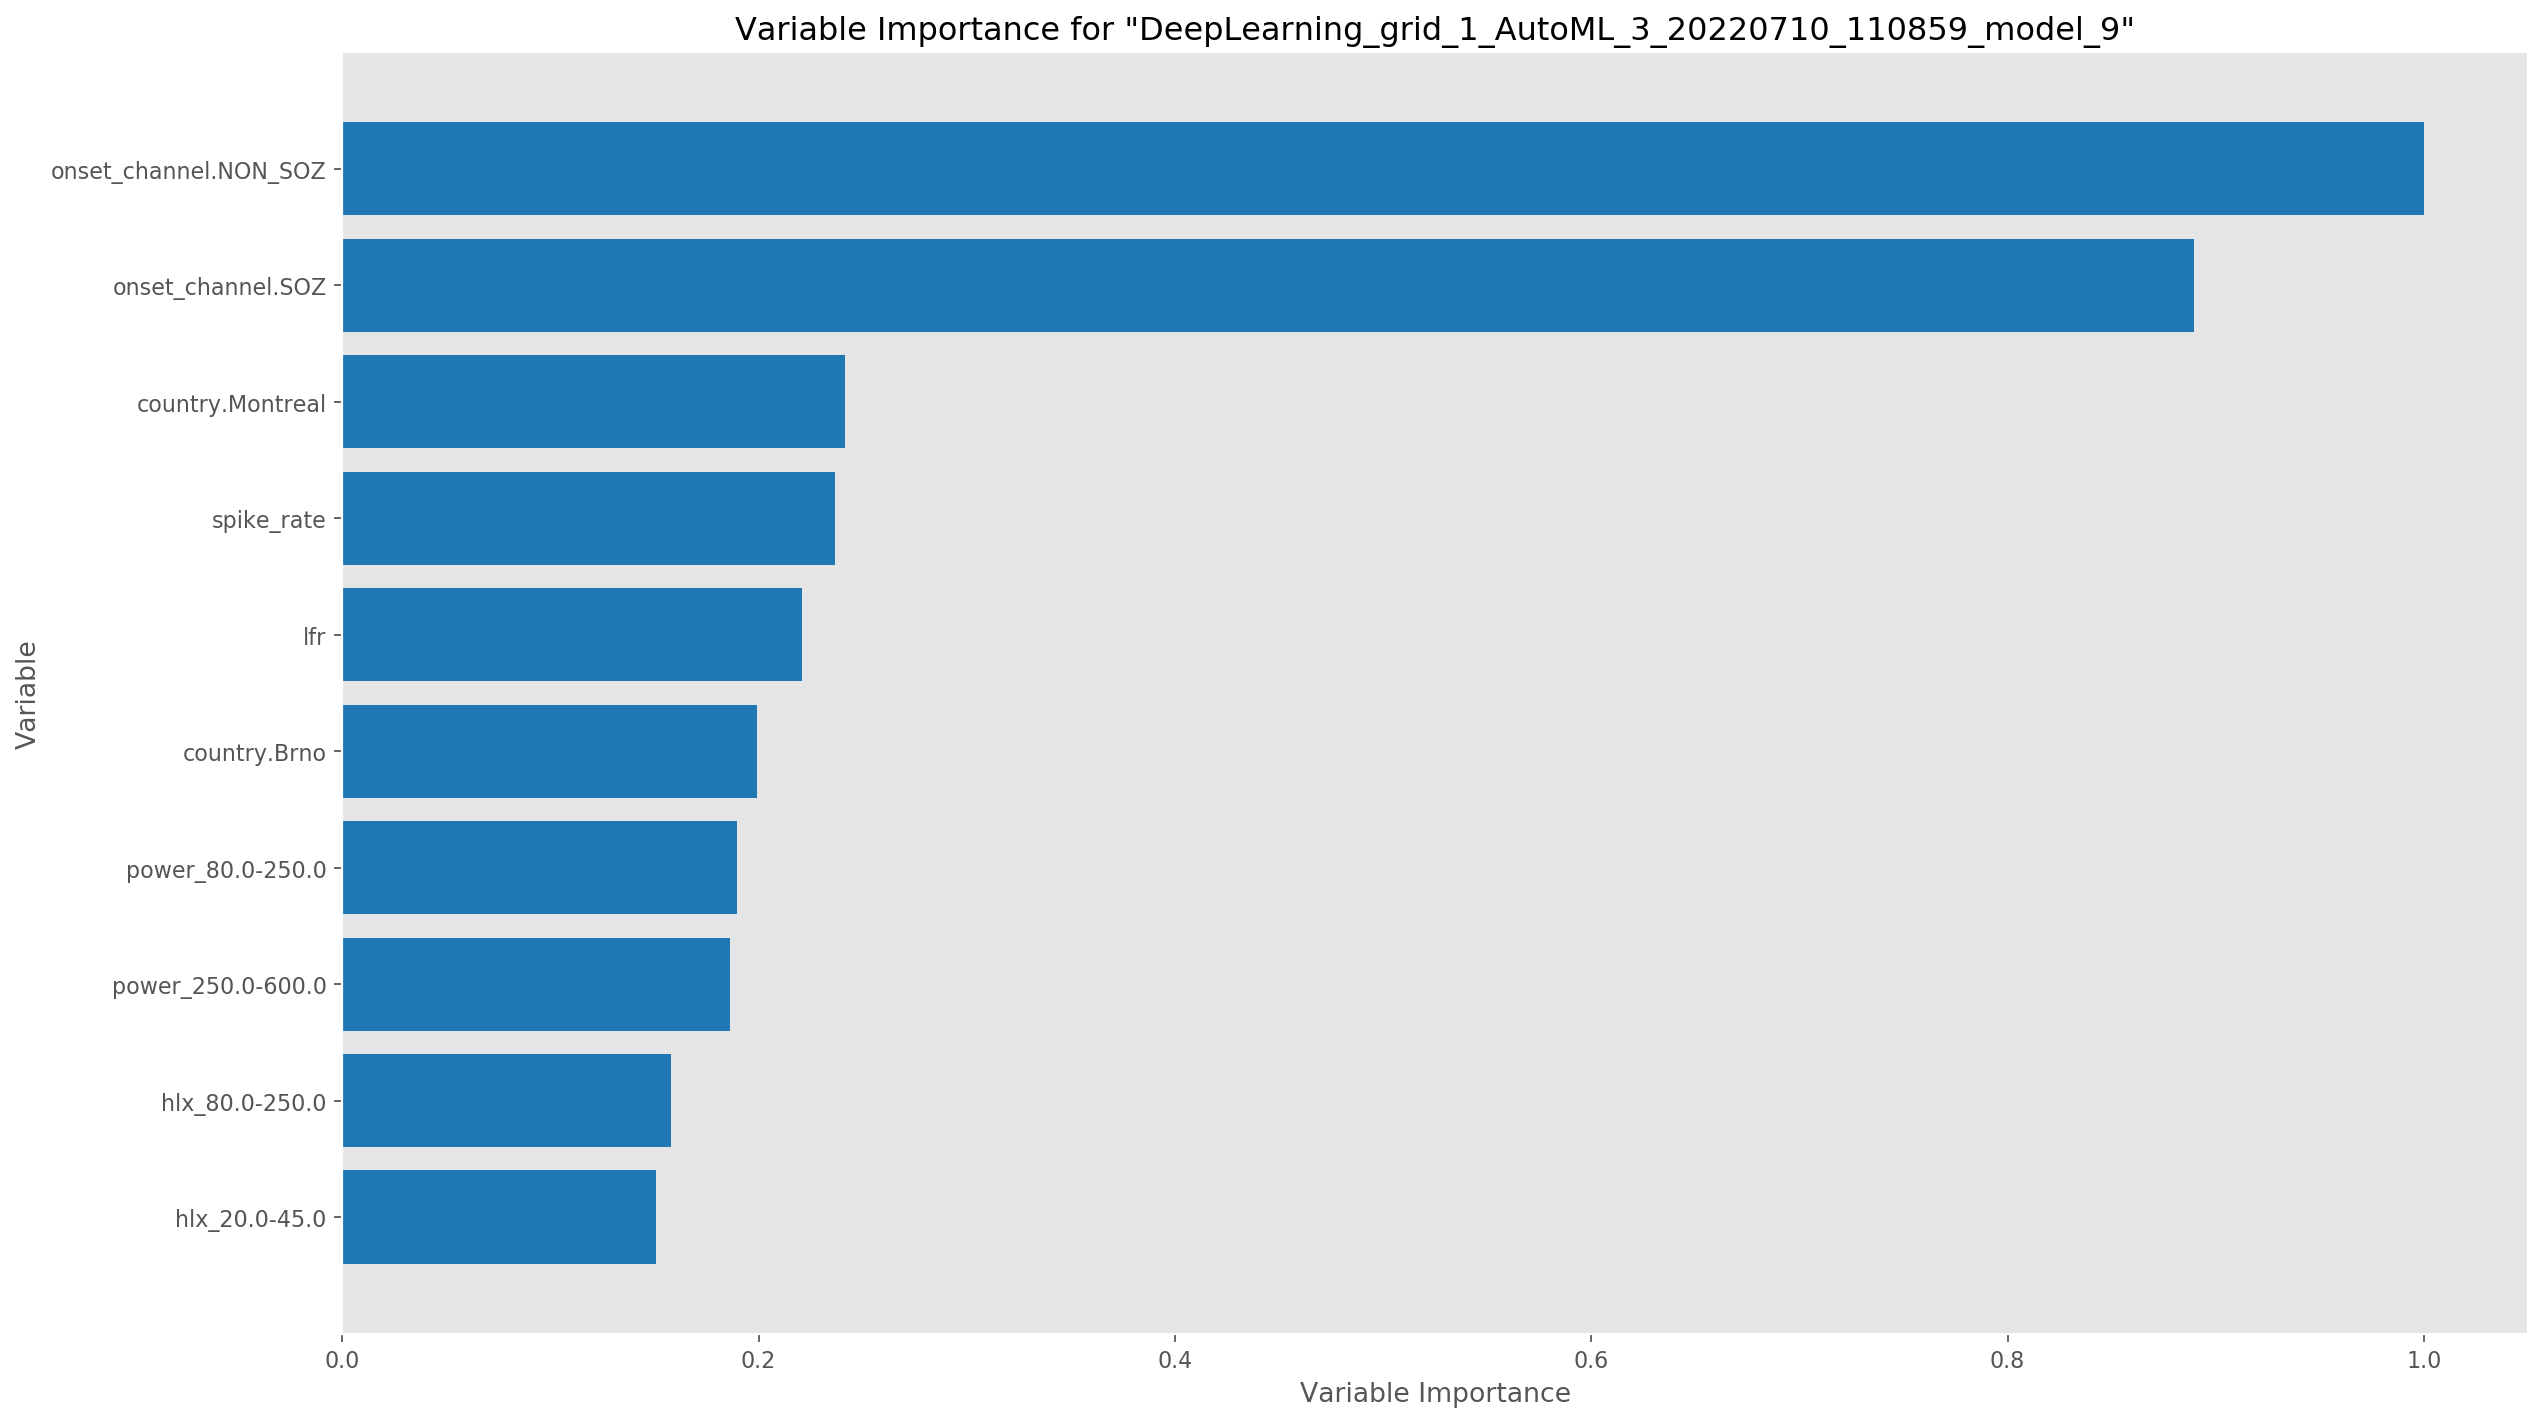

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

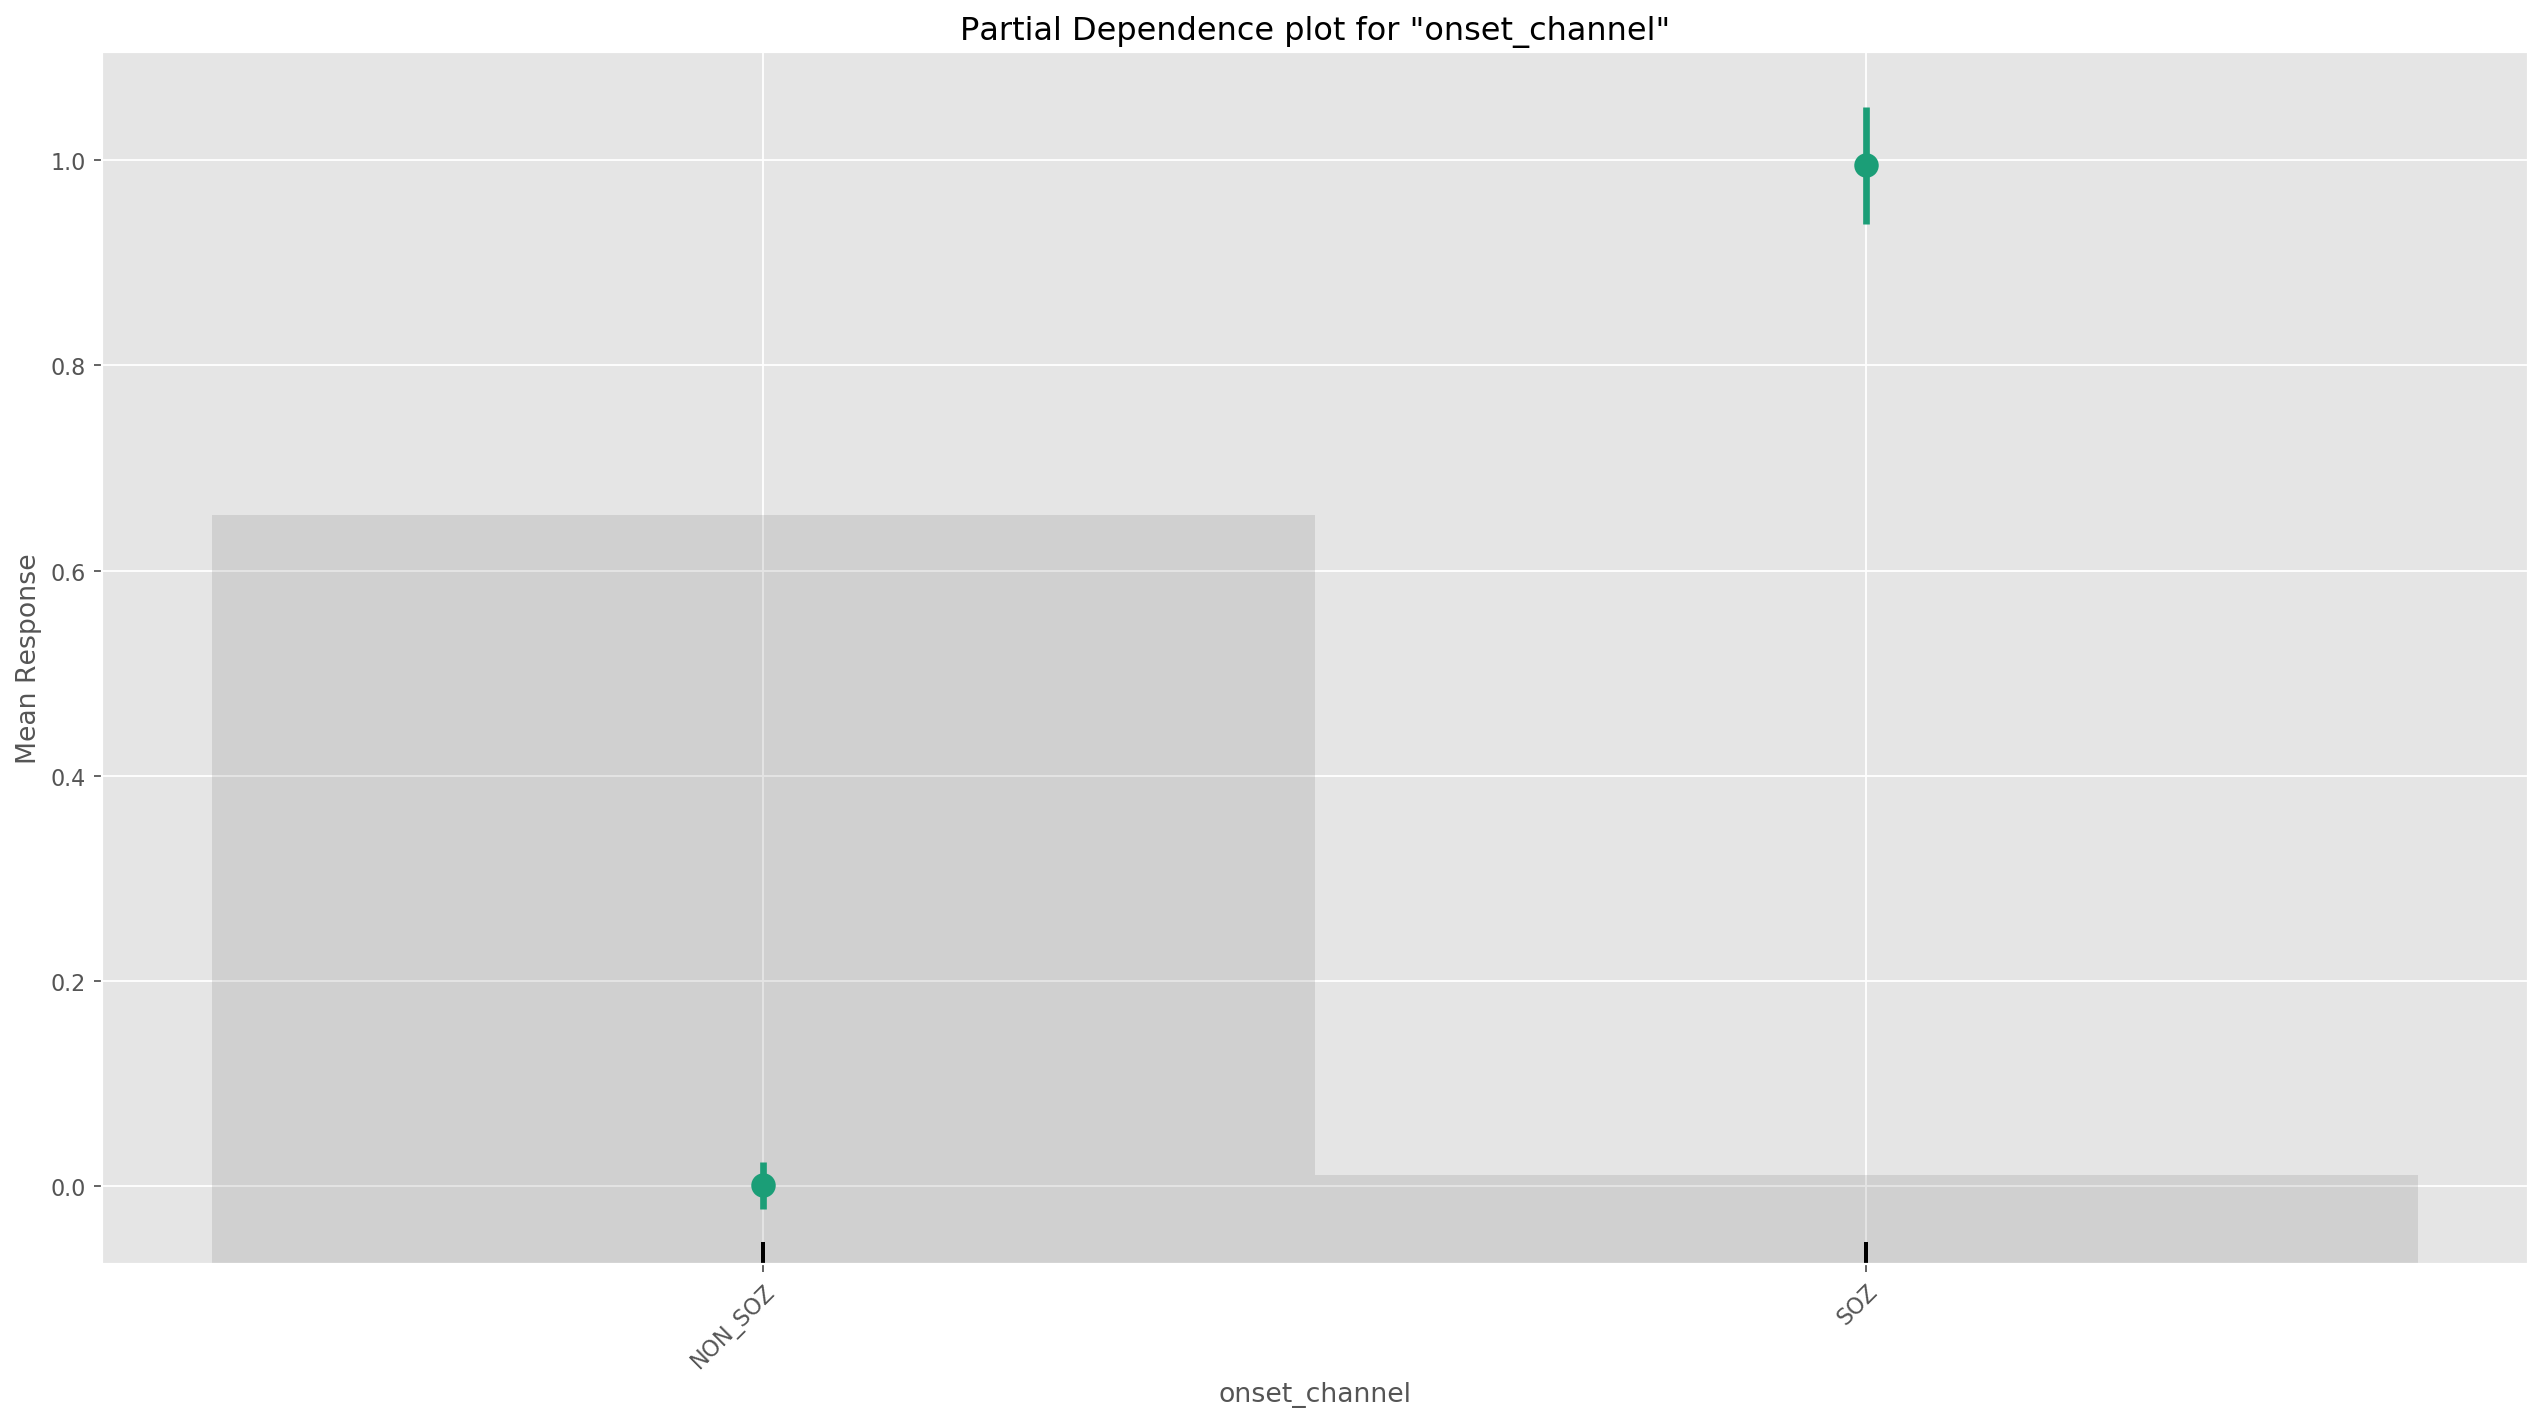

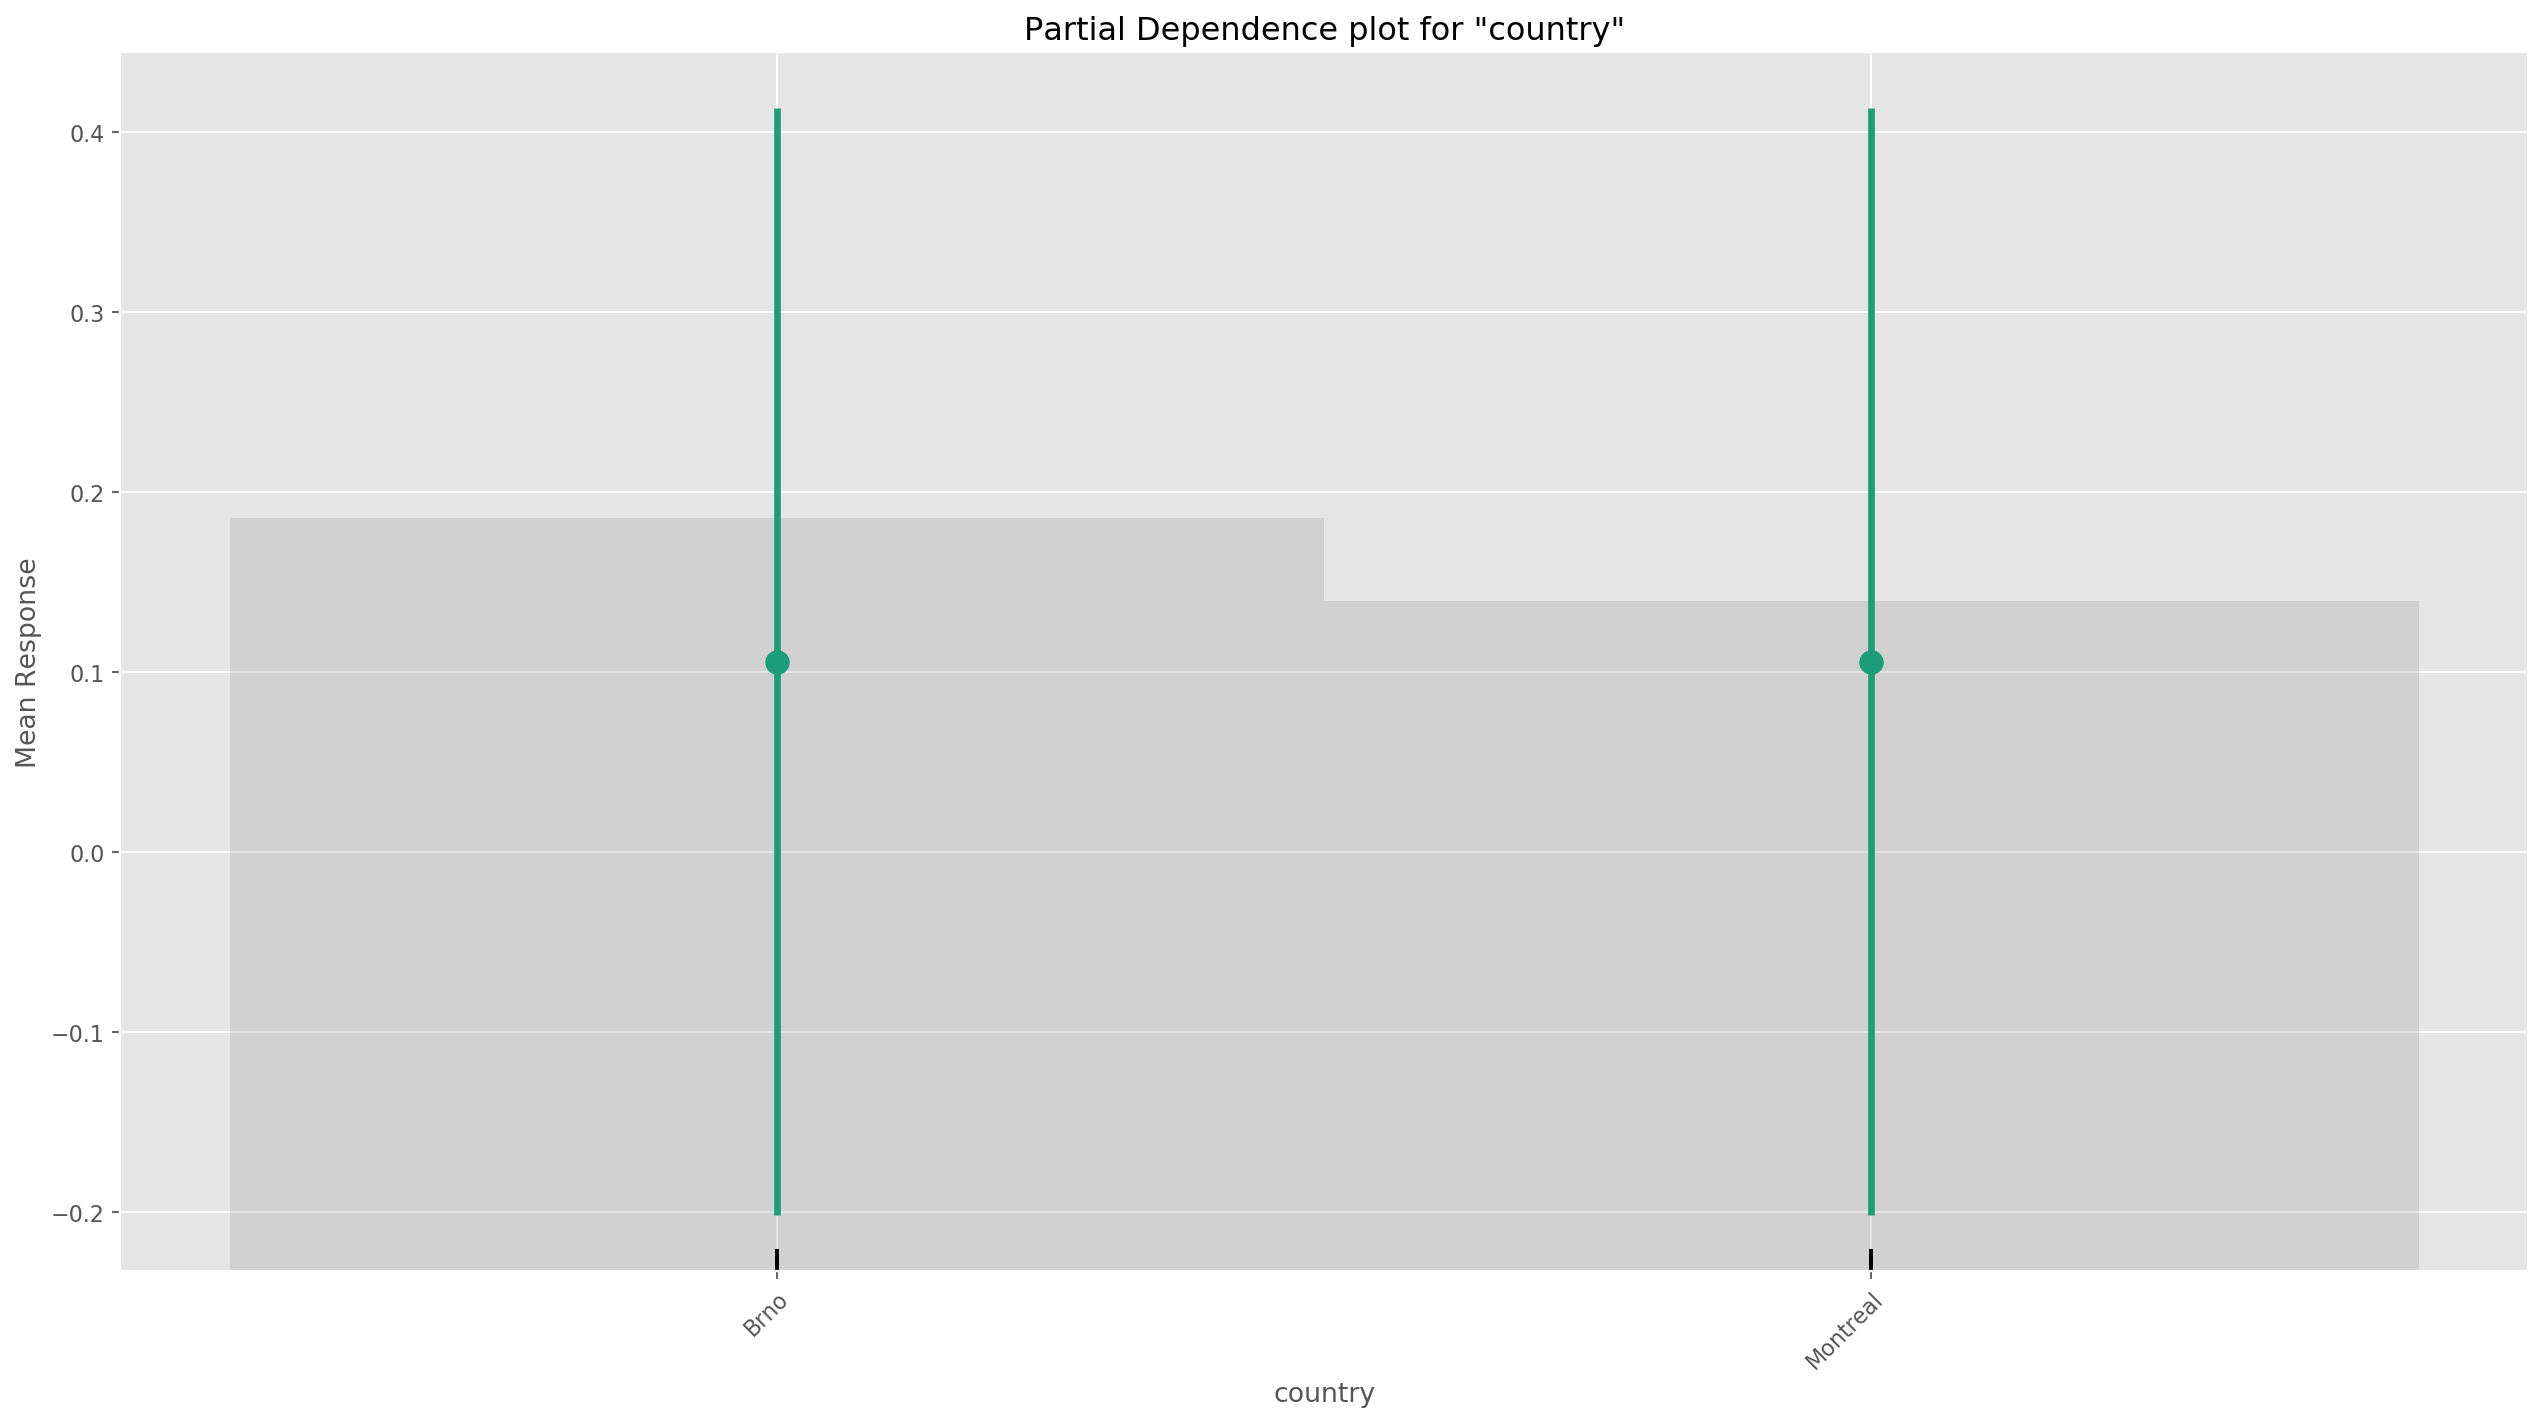

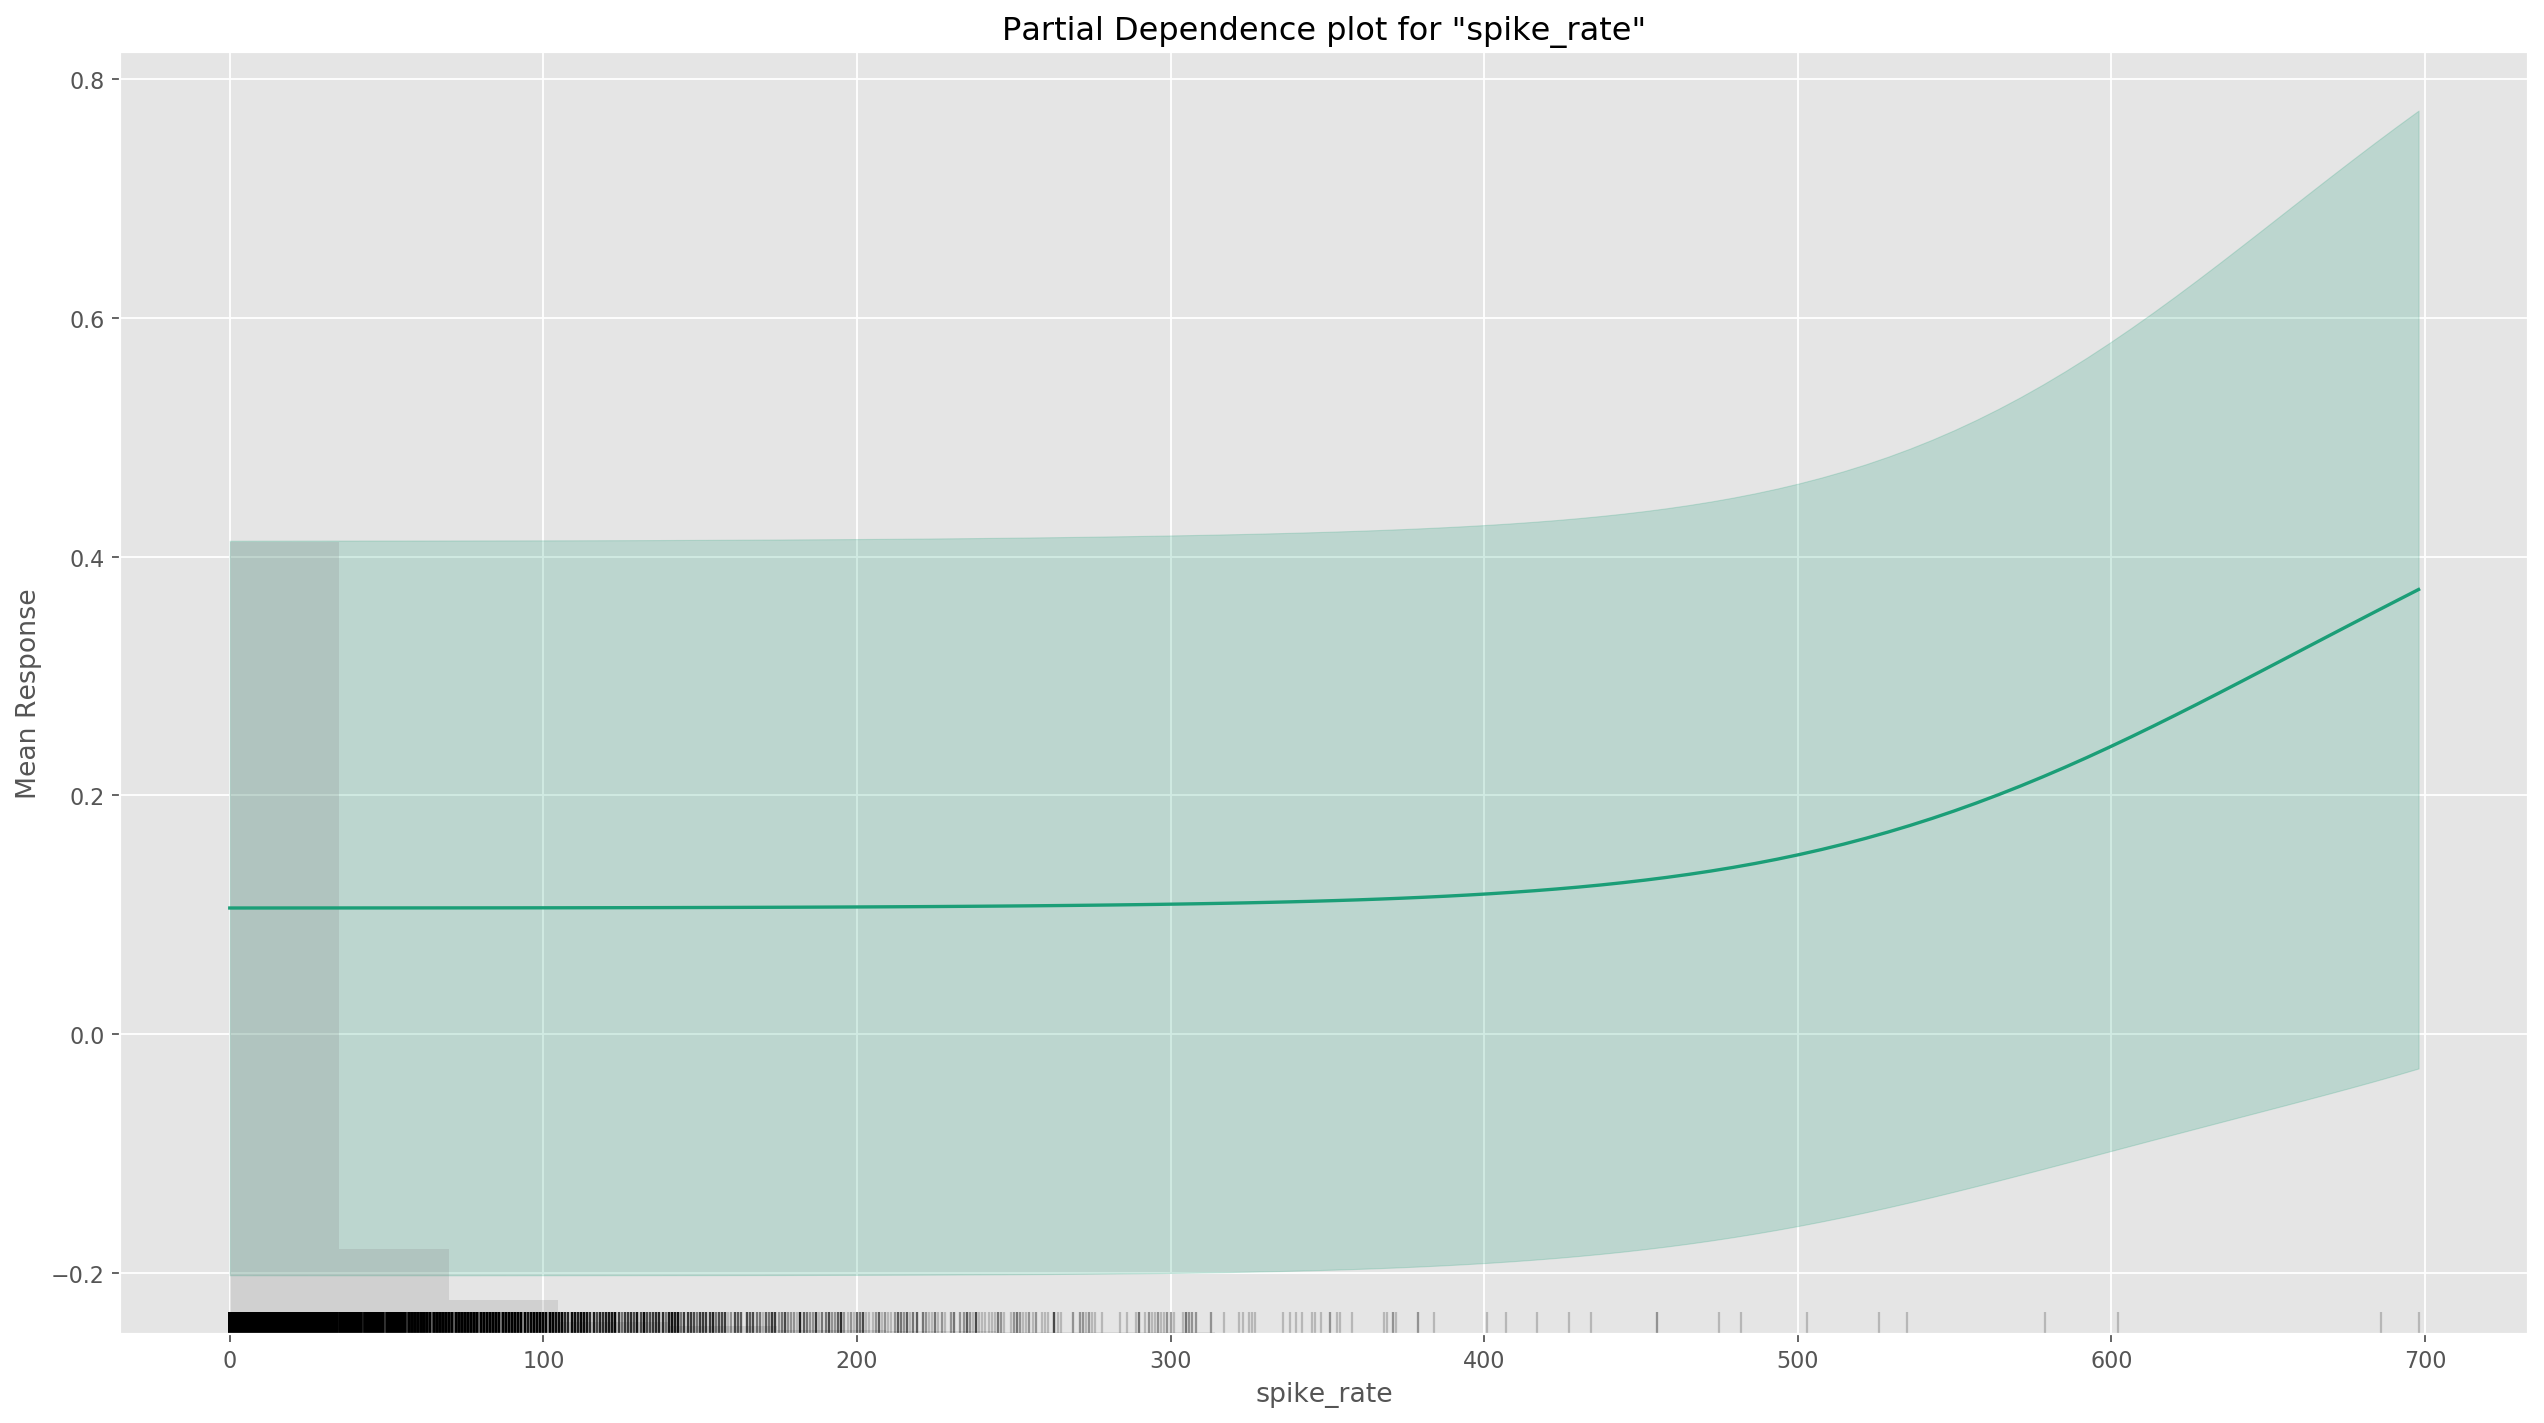

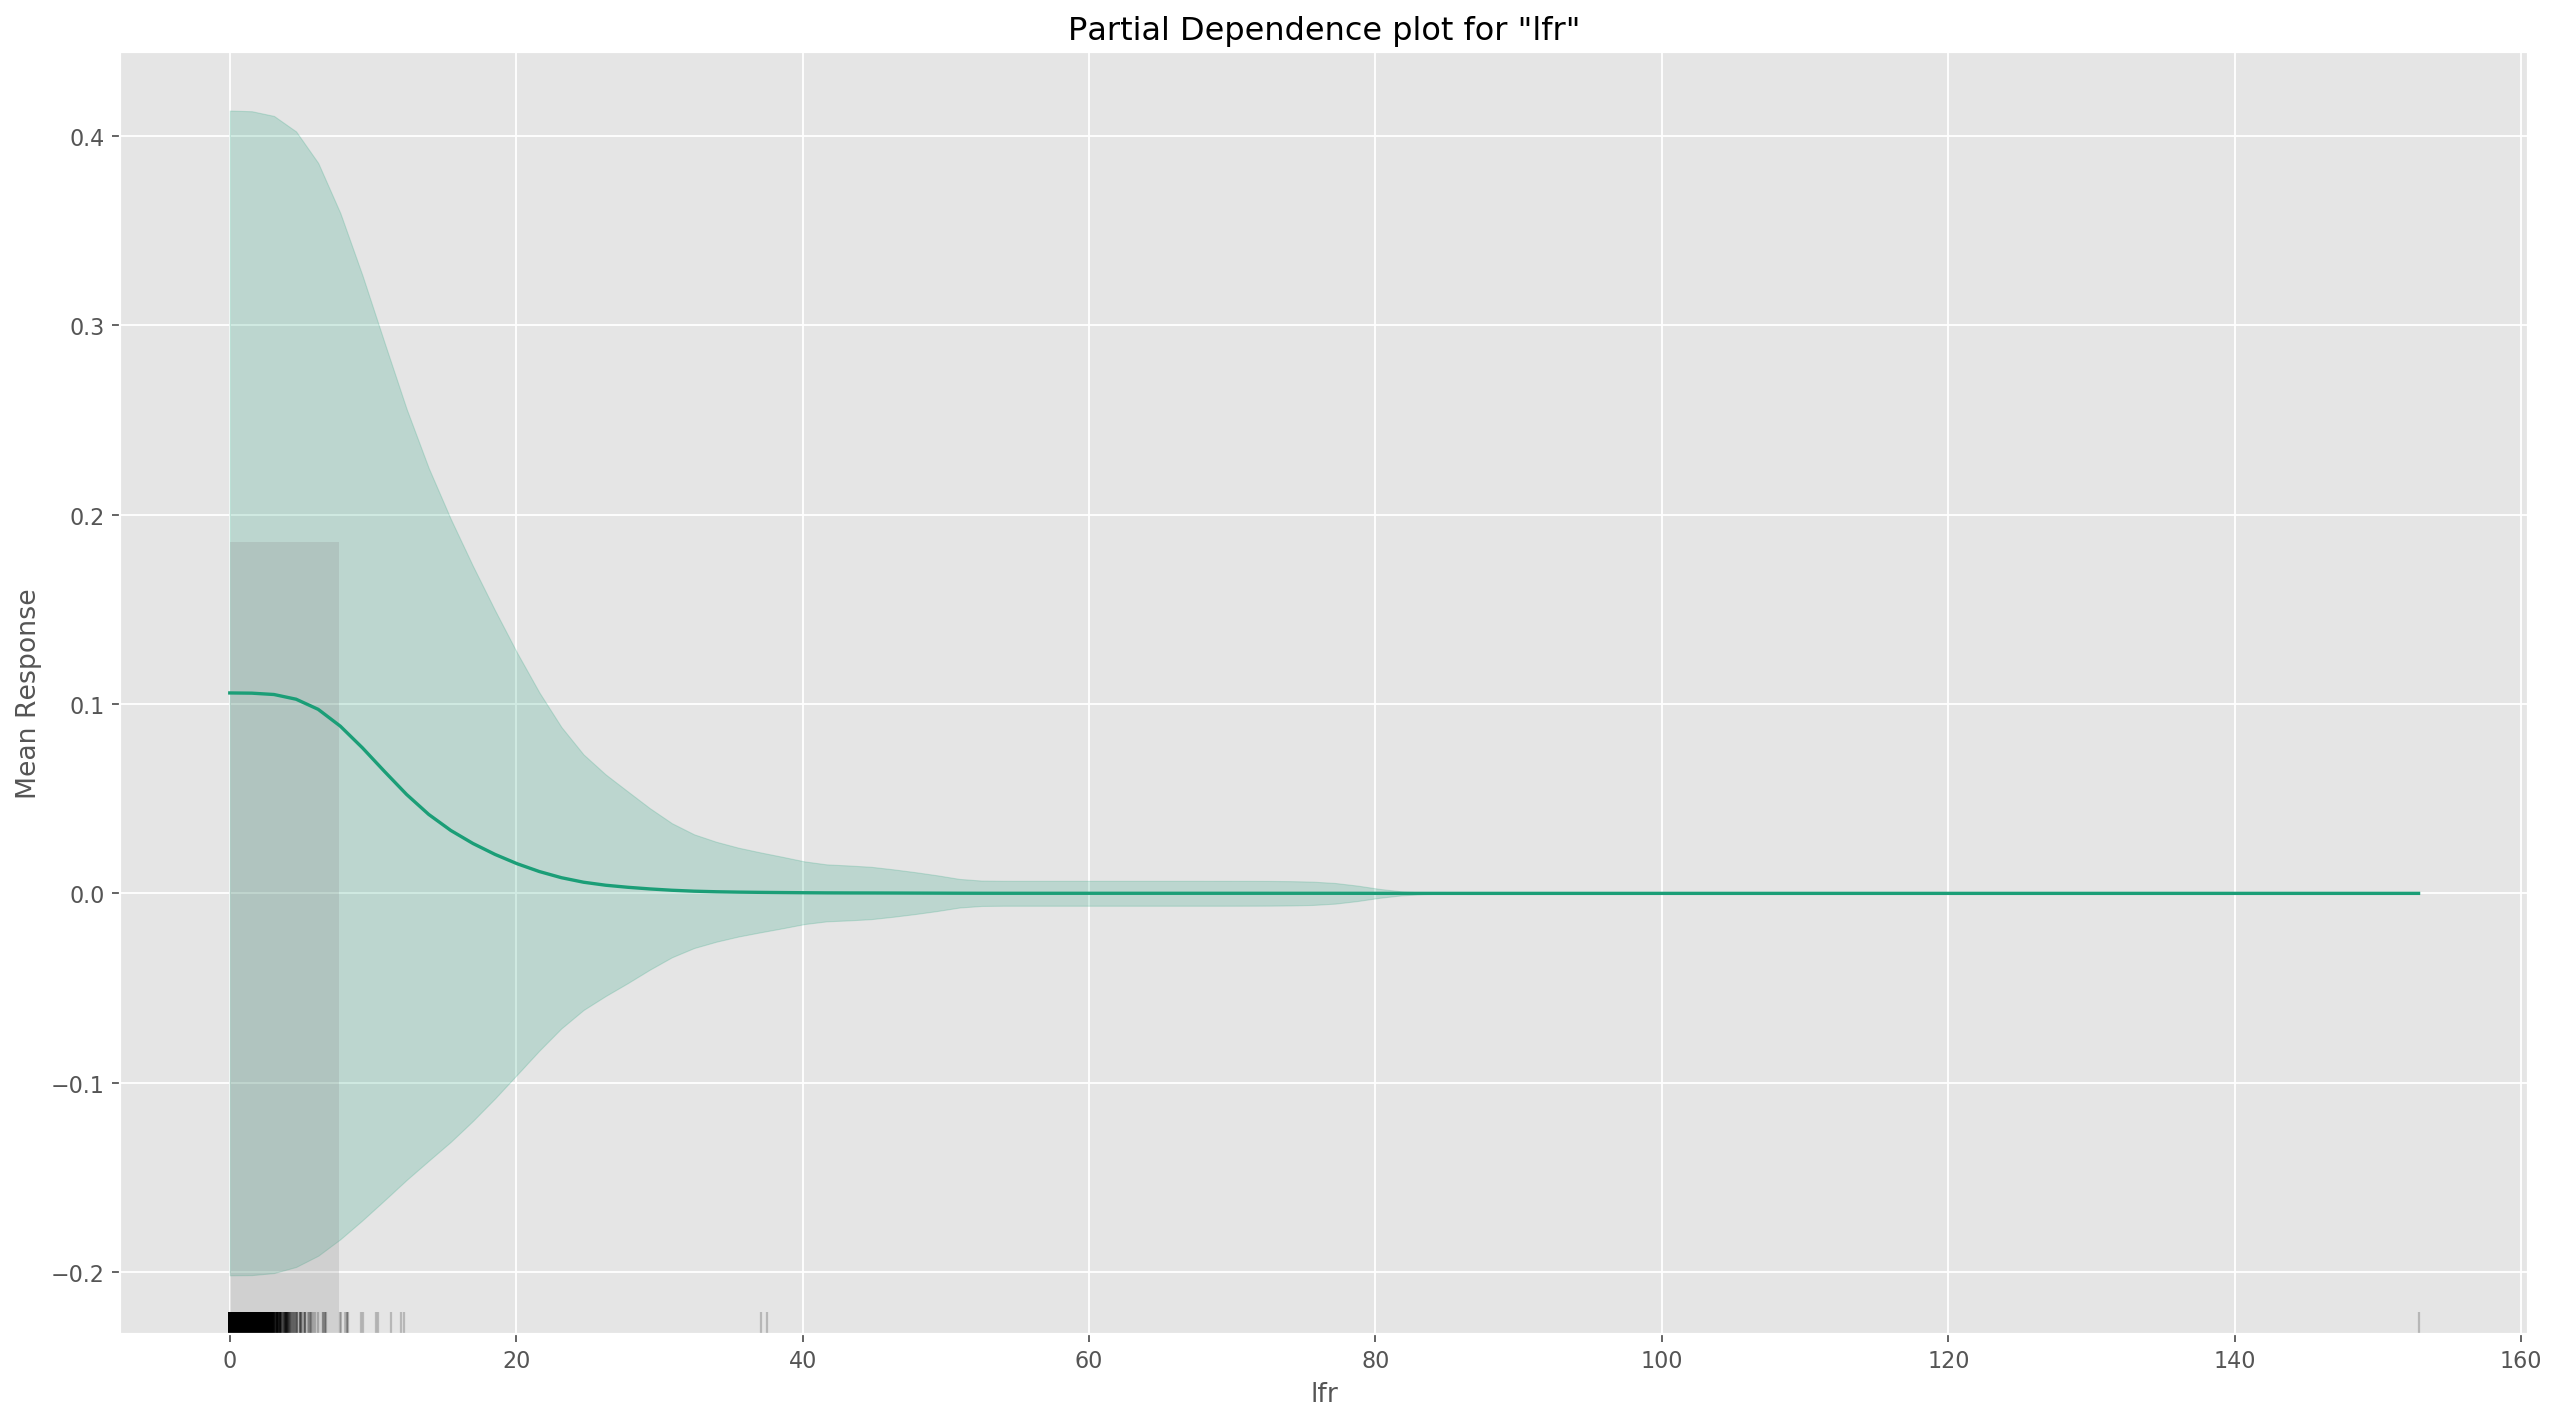

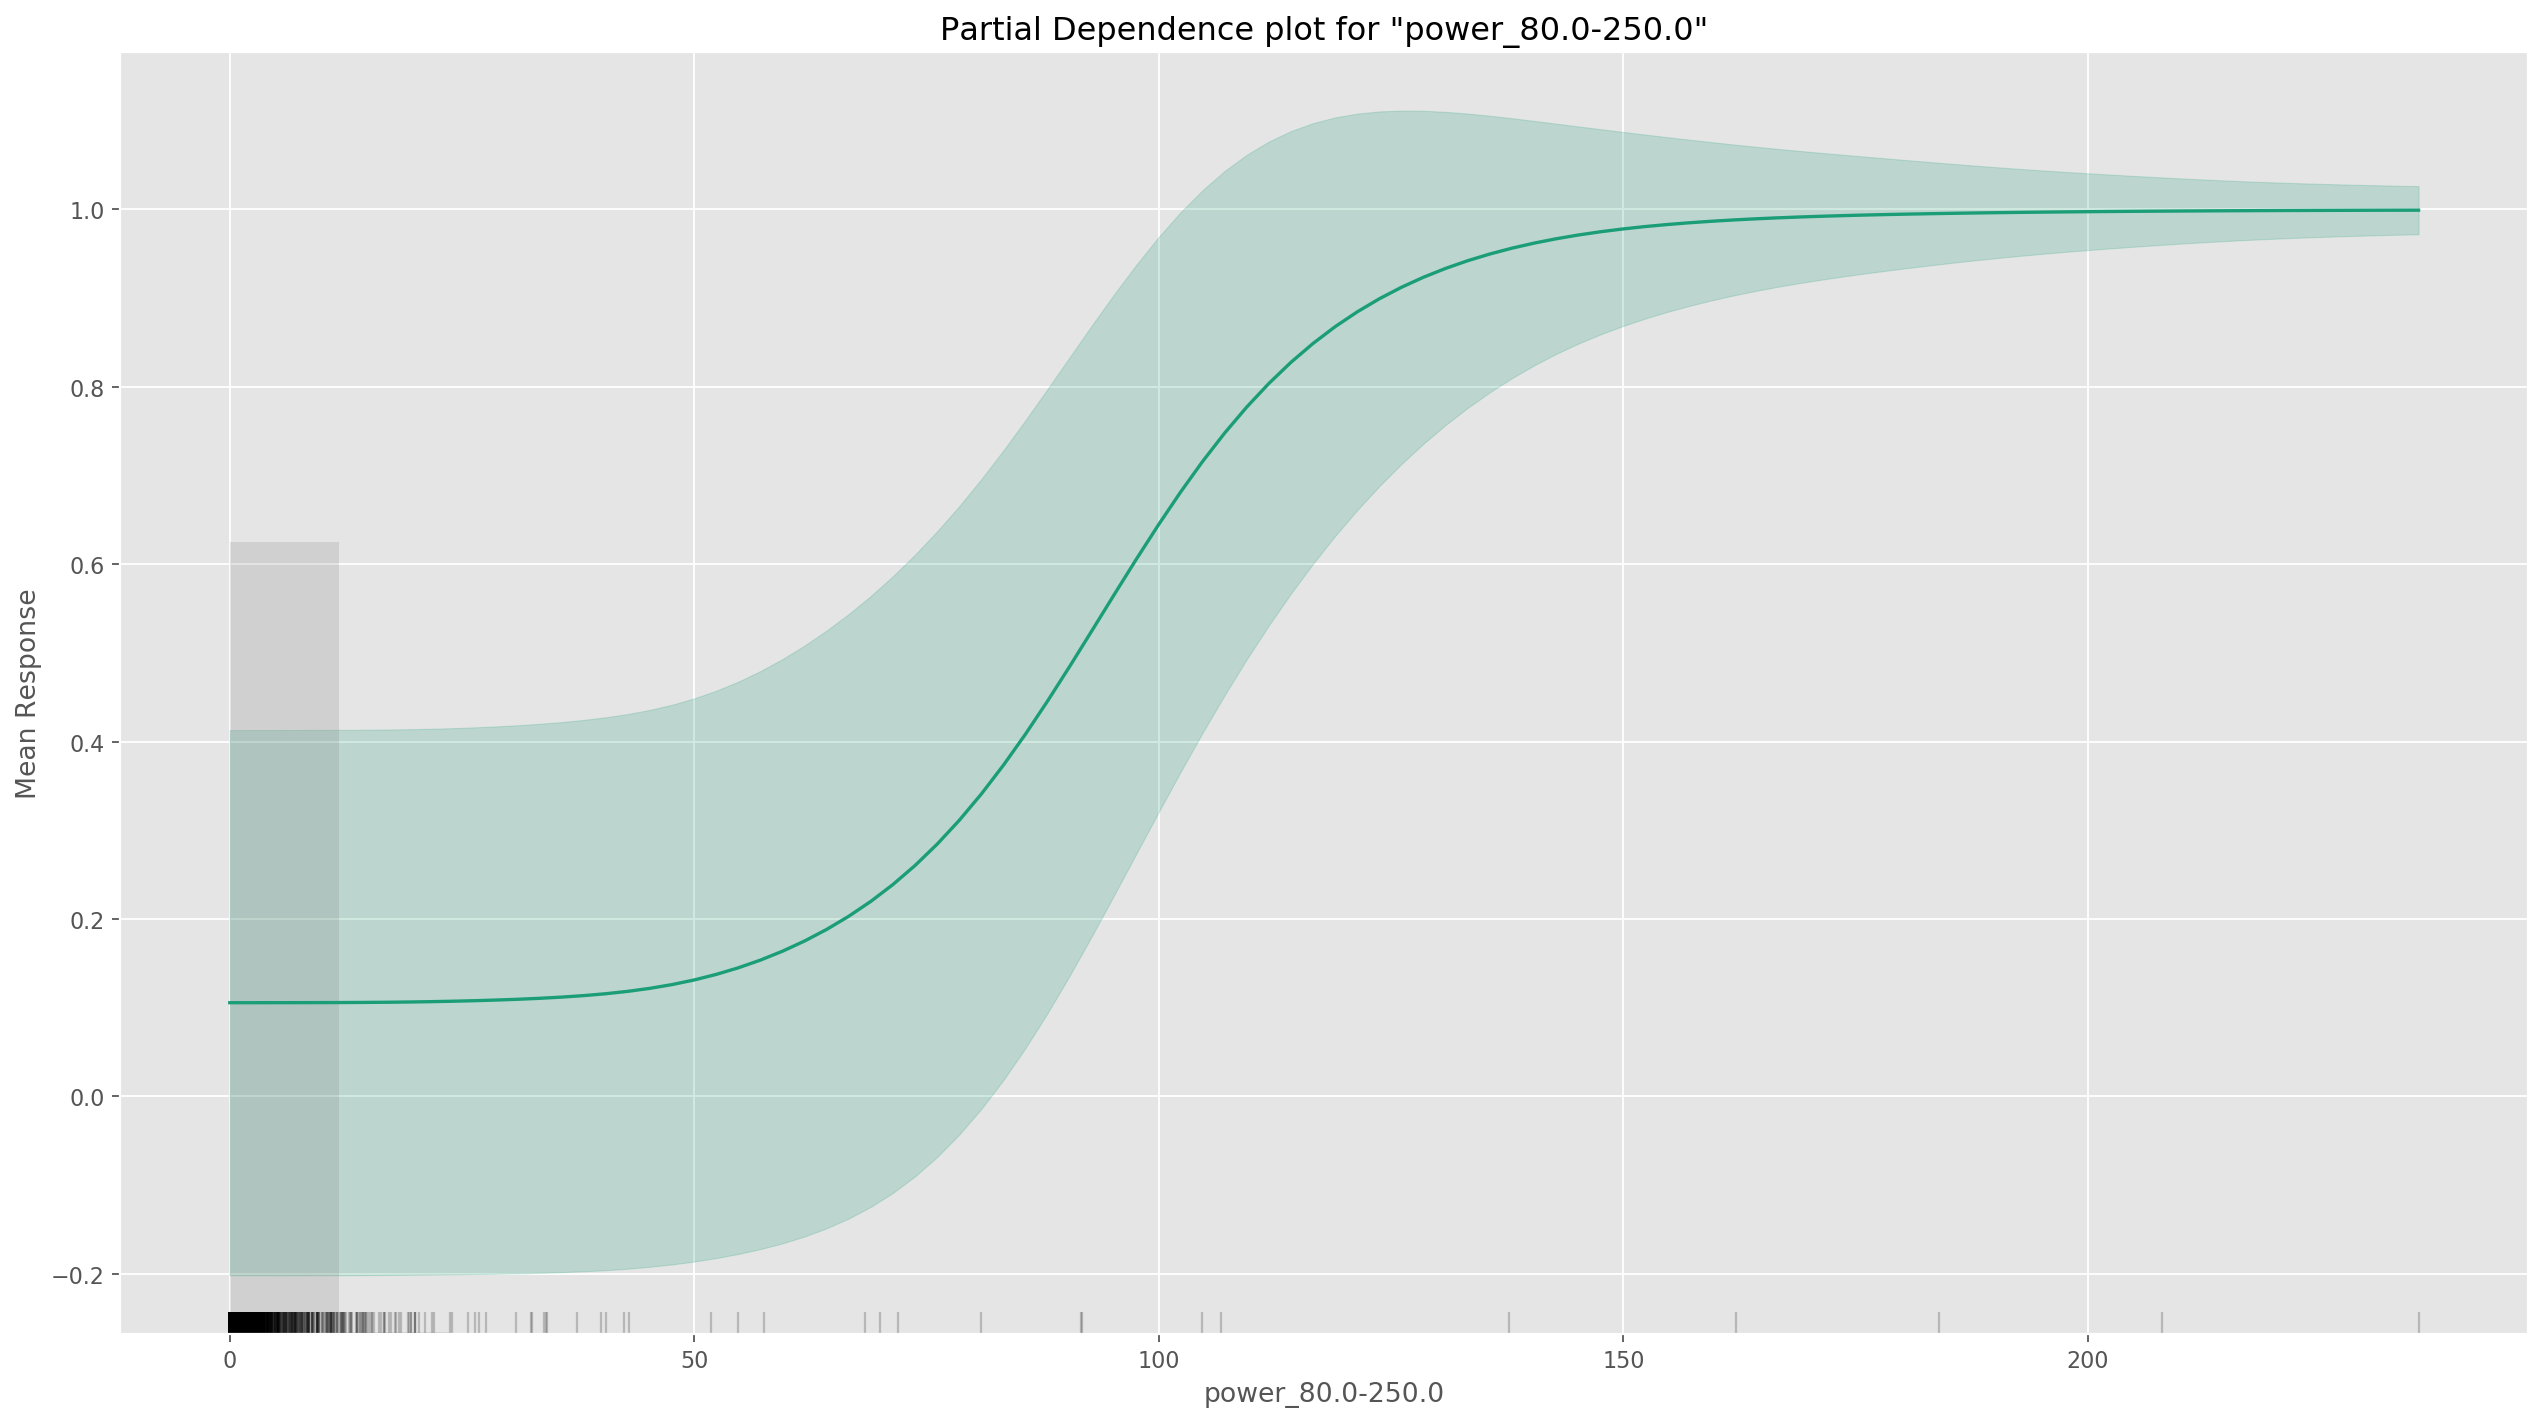

In [47]:
# Explain a single H2O model (e.g. leader model from AutoML)

exm = aml.leader.explain(test)

In [48]:
# Leader Deep Learning(DL) model 

model = h2o.get_model('DeepLearning_grid_1_AutoML_3_20220710_110859_model_9')

In [49]:
# Use Dl model on test set

model.model_performance(test)


ModelMetricsBinomial: deeplearning
** Reported on test data. **

MSE: 0.00037702667238258475
RMSE: 0.019417174675595436
LogLoss: 0.006672829525593659
Mean Per-Class Error: 0.0007340132288078009
AUC: 0.9995462296704908
AUCPR: 0.9942341100323189
Gini: 0.9990924593409816

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9942990556443744: 


,,normal,pathologic,Error,Rate
0,normal,20696.0,5.0,0.0002,(5.0/20701.0)
1,pathologic,3.0,2443.0,0.0012,(3.0/2446.0)
2,Total,20699.0,2448.0,0.0003,(8.0/23147.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,9.942991e-01,0.998365,265.0
1,max f2,4.981849e-03,0.998775,273.0
2,max f0point5,9.942991e-01,0.998121,265.0
3,max accuracy,9.942991e-01,0.999654,265.0
4,max precision,9.997613e-01,0.997988,106.0
5,max recall,1.633149e-08,1.000000,399.0
6,max specificity,1.000000e+00,0.999807,0.0
7,max absolute_mcc,9.942991e-01,0.998172,265.0
8,max min_per_class_accuracy,4.981849e-03,0.999469,273.0
9,max mean_per_class_accuracy,4.981849e-03,0.999530,273.0



Gains/Lift Table: Avg response rate: 10.57 %, avg score: 10.58 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010023,9.999999e-01,9.300047,9.300047,0.982759,1.000000e+00,0.982759,1.000000,0.093213,0.093213,830.004652,830.004652,0.093020
1,2,0.020003,9.999971e-01,9.463205,9.381450,1.000000,9.999988e-01,0.991361,0.999999,0.094440,0.187653,846.320523,838.144968,0.187460
2,3,0.030025,9.999891e-01,9.463205,9.408741,1.000000,9.999933e-01,0.994245,0.999997,0.094849,0.282502,846.320523,840.874074,0.282309
3,4,0.040005,9.999777e-01,9.463205,9.422327,1.000000,9.999844e-01,0.995680,0.999994,0.094440,0.376942,846.320523,842.232746,0.376749
4,5,0.050028,9.999594e-01,9.463205,9.430517,1.000000,9.999685e-01,0.996546,0.999989,0.094849,0.471791,846.320523,843.051713,0.471597
5,6,0.100013,9.993570e-01,9.455026,9.442766,0.999136,9.998110e-01,0.997840,0.999900,0.472608,0.944399,845.502614,844.276634,0.944157
6,7,0.149998,3.951915e-06,1.104177,6.664037,0.116681,1.162337e-01,0.704205,0.705429,0.055192,0.999591,10.417693,566.403710,0.949980
7,8,0.200026,9.865980e-07,0.000000,4.997308,0.000000,1.967904e-06,0.528078,0.528996,0.000000,0.999591,-100.000000,399.730816,0.894041
8,9,0.299996,2.389892e-07,0.000000,3.332019,0.000000,5.021410e-07,0.352103,0.352715,0.000000,0.999591,-100.000000,233.201855,0.782259
9,10,0.400009,7.476161e-08,0.000000,2.498924,0.000000,1.412056e-07,0.264067,0.264527,0.000000,0.999591,-100.000000,149.892394,0.670428


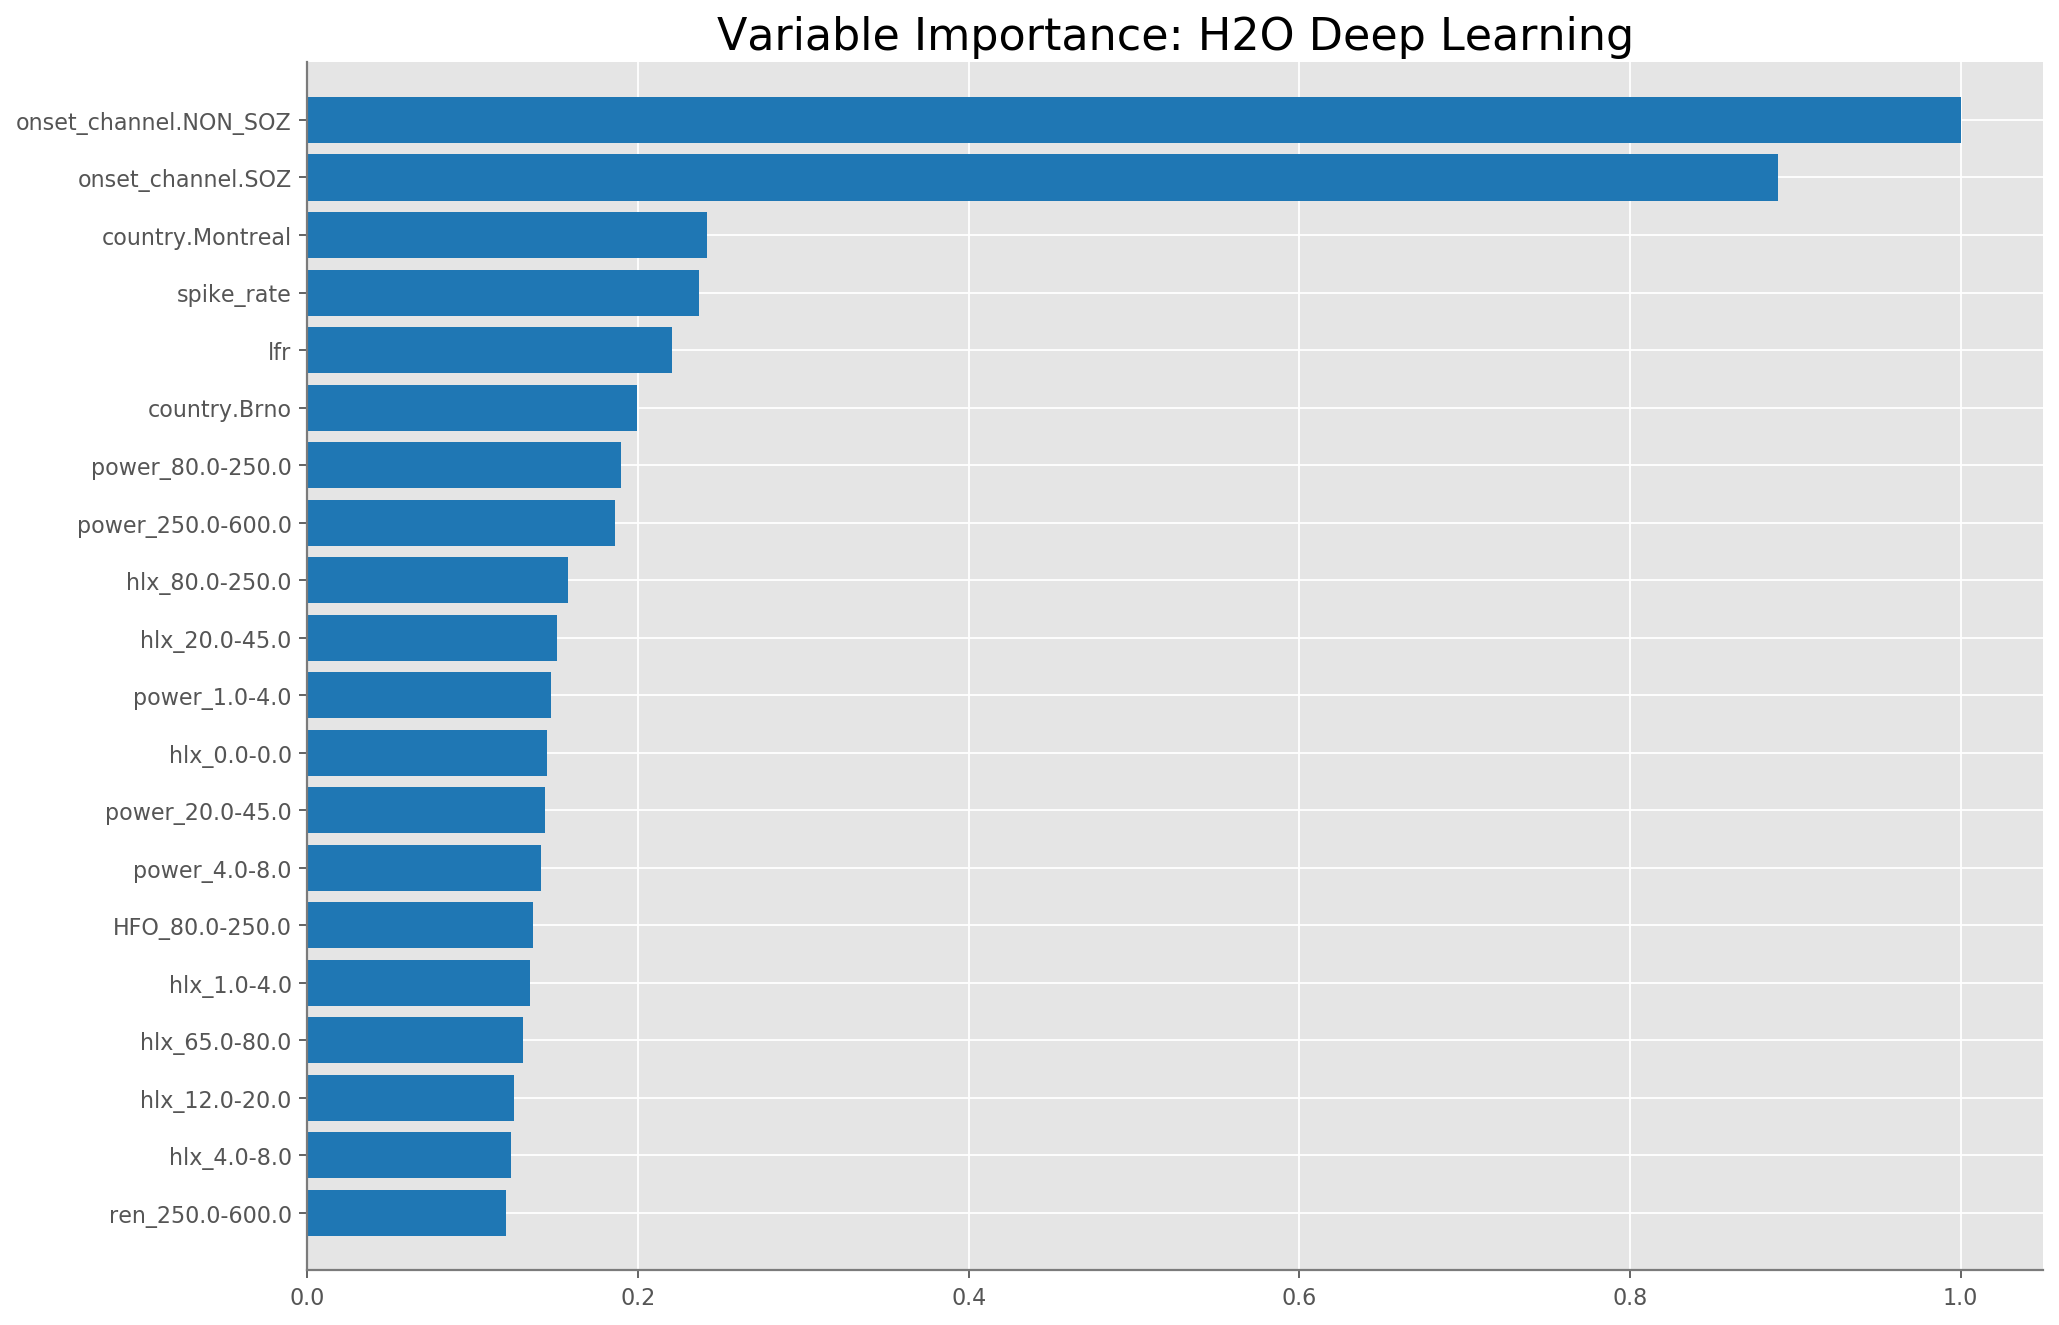

<Figure size 2240x1120 with 0 Axes>

In [50]:
# Show variable importance

model.varimp_plot(num_of_features=20)

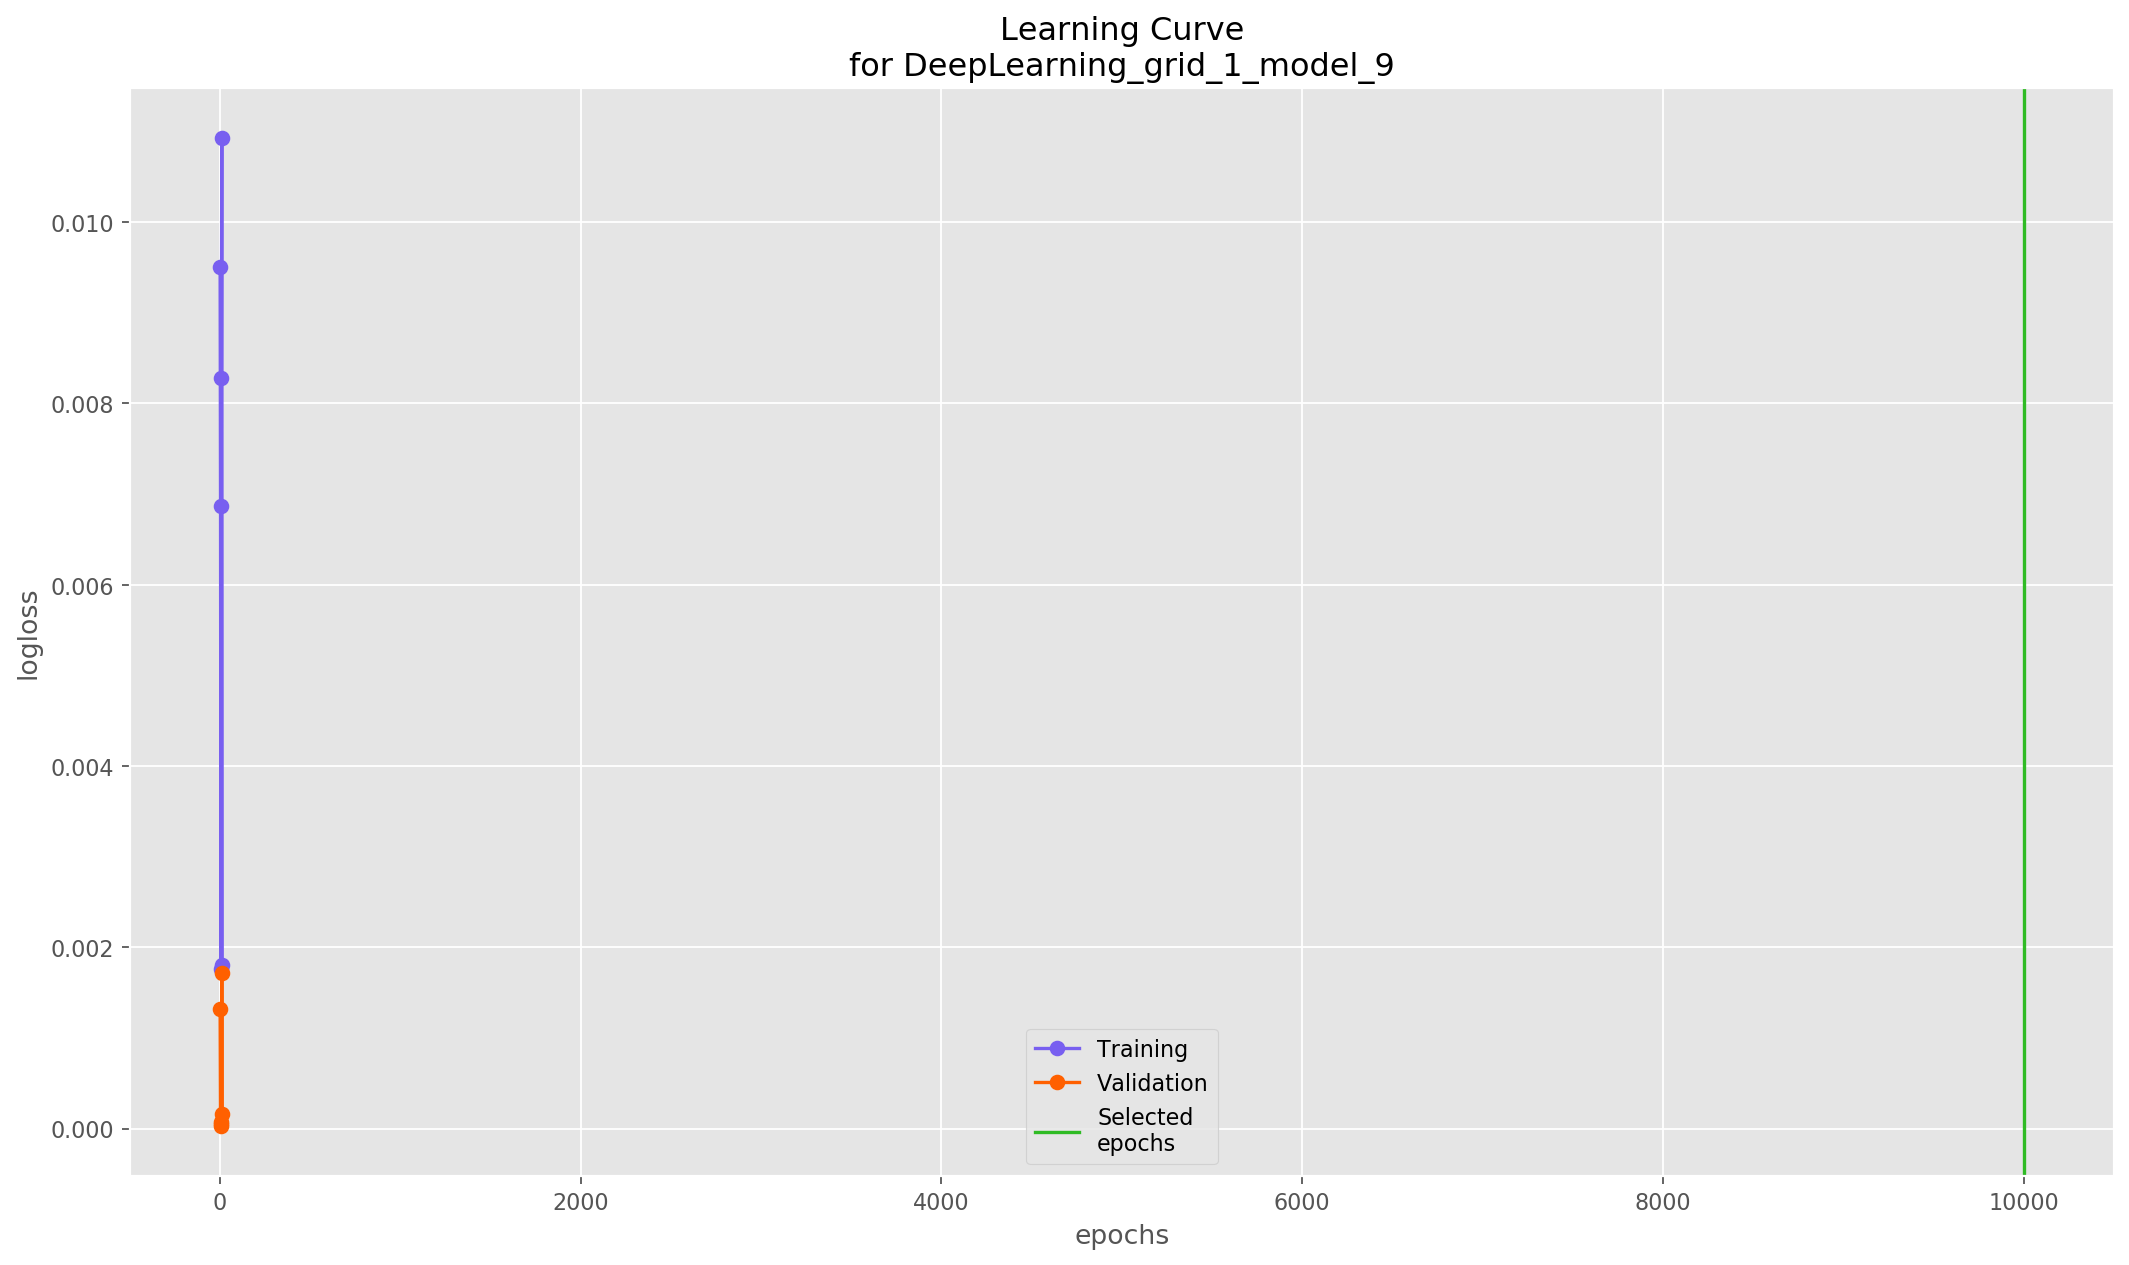

In [51]:
# Learning curve plot 

learning_curve_plot = model.learning_curve_plot()

In [52]:
# Make prediction

preds = aml.leader.predict(test)

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


In [53]:
# Combine the prediction with the test dataset

df = test.cbind(preds)

# Preview
df.head(10)

onset_channel,pathology,HFO_80.0-250.0,HFO_250.0-600.0,spike_rate,power_1.0-4.0,power_4.0-8.0,power_8.0-12.0,power_12.0-20.0,power_20.0-45.0,power_65.0-80.0,power_80.0-250.0,power_250.0-600.0,hlx_0.0-0.0,hlx_1.0-4.0,hlx_4.0-8.0,hlx_8.0-12.0,hlx_12.0-20.0,hlx_20.0-45.0,hlx_65.0-80.0,hlx_80.0-250.0,hlx_250.0-600.0,pse,pac,fac,lfr,lin_corr_median_0.0-0.0,ren_0.0-0.0,phase_sync_0.0-0.0,phase_const_0.0-0.0,pli_0.0-0.0,pli_tau_0.0-0.0,coherence_0.0-0.0,lin_corr_median_1.0-4.0,ren_1.0-4.0,phase_sync_1.0-4.0,phase_const_1.0-4.0,pli_1.0-4.0,pli_tau_1.0-4.0,coherence_1.0-4.0,lin_corr_median_4.0-8.0,ren_4.0-8.0,phase_sync_4.0-8.0,phase_const_4.0-8.0,pli_4.0-8.0,pli_tau_4.0-8.0,coherence_4.0-8.0,lin_corr_median_8.0-12.0,ren_8.0-12.0,phase_sync_8.0-12.0,phase_const_8.0-12.0,pli_8.0-12.0,pli_tau_8.0-12.0,coherence_8.0-12.0,lin_corr_median_12.0-20.0,ren_12.0-20.0,phase_sync_12.0-20.0,phase_const_12.0-20.0,pli_12.0-20.0,pli_tau_12.0-20.0,coherence_12.0-20.0,lin_corr_median_20.0-45.0,ren_20.0-45.0,phase_sync_20.0-45.0,phase_const_20.0-45.0,pli_20.0-45.0,pli_tau_20.0-45.0,coherence_20.0-45.0,lin_corr_median_65.0-80.0,ren_65.0-80.0,phase_sync_65.0-80.0,phase_const_65.0-80.0,pli_65.0-80.0,pli_tau_65.0-80.0,coherence_65.0-80.0,lin_corr_median_80.0-250.0,ren_80.0-250.0,phase_sync_80.0-250.0,phase_const_80.0-250.0,pli_80.0-250.0,pli_tau_80.0-250.0,coherence_80.0-250.0,lin_corr_median_250.0-600.0,ren_250.0-600.0,phase_sync_250.0-600.0,phase_const_250.0-600.0,pli_250.0-600.0,pli_tau_250.0-600.0,coherence_250.0-600.0,segm_type,segm_number,country,predict,normal,pathologic
NON_SOZ,normal,16,40,49,0.518898,0.780688,1.059,0.246359,0.417731,0.0172302,0.0471388,0.0136991,22.8359,1.12322,1.05522,1.01696,1.03695,1.06297,1.00613,1.19346,1.06995,0.458209,-0.000984755,-0.00905946,0.168028,0.895323,0.0916576,0.836928,0.666348,0.986216,-99.3333,0.946648,0.942342,0.0795242,0.937776,0.815142,0.998376,-186.042,0.979502,0.974472,0.0350385,0.954852,0.837306,0.99803,-98.88,0.989349,0.996158,0.00660758,0.990449,0.940477,0.999811,-71.76,0.998444,0.991969,0.00839352,0.978559,0.892505,0.995642,-36.325,0.996168,0.996082,0.00432014,0.988694,0.915274,0.992457,-8.10333,0.998027,0.995883,0.00233462,0.988538,0.925232,0.999162,-9.625,0.997981,0.997392,0.00183677,0.990797,0.904985,0.931978,-0.286667,0.998458,0.993981,0.00284724,0.979349,1,0.841924,-0.113333,0.996071,0,0,Montreal,normal,1,1.46011e-08
NON_SOZ,normal,7,49,25,0.472965,0.964676,0.716276,0.190351,0.285159,0.0119757,0.0306428,0.00867748,15.9948,1.12082,1.04599,1.01865,1.03682,1.06514,1.00607,1.19647,1.06968,0.489201,-0.00124926,-0.00812918,0.311882,0.80543,0.15446,0.738541,0.533939,0.984647,-107.542,0.925594,0.950784,0.0875988,0.949821,0.810448,0.998278,-202.5,0.98183,0.954714,0.0519073,0.931563,0.780118,0.999004,-104.74,0.983585,0.990476,0.0136245,0.980753,0.896656,0.999773,-71.48,0.996043,0.979759,0.0162106,0.953787,0.806158,0.995225,-34.7917,0.990522,0.993031,0.00514991,0.979625,0.857497,0.993686,-7.50333,0.996582,0.990899,0.0046373,0.975816,0.870893,0.995709,-9.31667,0.995484,0.994831,0.00303515,0.982651,0.849122,0.914038,-0.568333,0.996949,0.996837,0.00170874,0.987526,1,0.861303,-0.0366667,0.997865,0,0,Montreal,normal,1,1.95632e-09
NON_SOZ,normal,6,19,8,0.347042,1.11594,1.01504,0.31053,0.481209,0.0210714,0.0541044,0.0149408,9.20048,1.2172,1.04755,1.01692,1.03646,1.06127,1.00601,1.19697,1.06963,0.566548,0.000565154,-0.0015228,0.884501,0.606213,0.25021,0.519823,0.359725,0.969987,-84.5833,0.814854,0.877887,0.151694,0.858039,0.639372,0.99688,-188.833,0.945312,0.910682,0.0819024,0.872303,0.671488,0.99627,-92.92,0.968876,0.966288,0.0354714,0.943581,0.791414,0.999378,-69.3733,0.986529,0.91726,0.0433487,0.862112,0.651536,0.996284,-30.2333,0.964943,0.931246,0.0329878,0.873649,0.631333,0.963023,-8.09333,0.968114,0.928506,0.0205303,0.87357,0.714121,0.983354,-6.8,0.967883,0.96887,0.015679,0.924473,0.657152,0.846088,-0.553333,0.982275,0.990122,0.00480543,0.96761,1,0.80995,0.1,0.993455,0,0,Montreal,normal,1,1.1825e-09
NON_SOZ,norm

In [54]:
# Create dataframe for first 20 predictions

df = h2o.as_list(df)

preds = df[['pathology', 'predict']].head(20)
preds

,pathology,predict
0,normal,normal
1,normal,normal
2,normal,normal
3,normal,normal
4,normal,normal
5,normal,normal
6,normal,normal
7,normal,normal
8,normal,normal
9,normal,normal


In [55]:
# Save the results

#df.to_csv('df.csv')
#preds.to_csv('preds.csv')